# Getting familiar with the dataset

In [1]:
from sklearn.datasets import fetch_20newsgroups
newsgroups_train = fetch_20newsgroups(subset='train')

from pprint import pprint
pprint(list(newsgroups_train.target_names))

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']


### QUESTION 1: To get started, plot a histogram of the number of training documents for each of the 20 categories to check if they are evenly distributed.

In [2]:
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(42)
import random
random.seed(42)
from matplotlib.patches import Rectangle

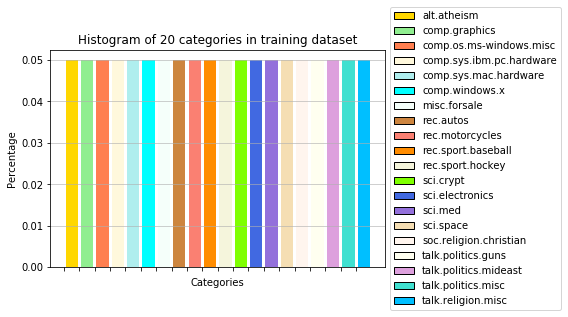

In [3]:
fig, axs = plt.subplots()

colors = ['gold', 'lightgreen', 
          'coral','cornsilk',
          'paleturquoise','cyan',
          'mintcream','peru',
          'salmon', 'darkorange',           
          'beige','chartreuse',
          'royalblue', 'mediumpurple',
          'wheat','seashell',
          'ivory','plum',
          'turquoise', 'deepskyblue', 
         ]
xlabels = newsgroups_train.target_names
n, bins, patches = plt.hist(newsgroups_train.target_names, bins=20, range = (0,20),density='true', rwidth=0.8)
for i in range(0,len(patches)):
    patches[i].set_facecolor(colors[i])
axs.set_xticks(np.arange(20))
#axs.set_xticklabels(xlabels, rotation=40, ha = "right")
axs.set_xticklabels([], rotation_mode="anchor")

plt.grid(axis='y', alpha=0.75)
handles = [Rectangle((0,0),1,1,color=c,ec="k") for c in colors]
plt.xlabel('Categories')
plt.ylabel('Percentage')
plt.title('Histogram of 20 categories in training dataset')
plt.legend(handles,list(newsgroups_train.target_names),loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig('Q1 .png', bbox_inches='tight')

In [4]:
categories = ['comp.graphics', 'comp.os.ms-windows.misc',
              'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware',
              'rec.autos', 'rec.motorcycles','rec.sport.baseball', 
              'rec.sport.hockey']
train_dataset = fetch_20newsgroups(subset = 'train', categories = categories,
                                   shuffle = True, random_state = None)
test_dataset = fetch_20newsgroups(subset = 'test', categories = categories,
                                  shuffle = True, random_state = None)

# Feature Extraction

### QUESTION 2: extract features from the textual data

In [5]:
from sklearn.feature_extraction.text import CountVectorizer
import nltk
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
from nltk import word_tokenize
from nltk.tag import pos_tag

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\SANDS\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\SANDS\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\SANDS\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


tokenize each line of each document, (lower), lemmatize with pos_tag, vectorize;

In [6]:
categories = ['comp.graphics', 'comp.os.ms-windows.misc', 
              'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware',
              'rec.autos', 'rec.motorcycles',
              'rec.sport.baseball', 'rec.sport.hockey']

train_dataset = fetch_20newsgroups(subset = 'train', categories = categories, shuffle = True, random_state = None)
test_dataset = fetch_20newsgroups(subset = 'test', categories = categories, shuffle = True, random_state = None)

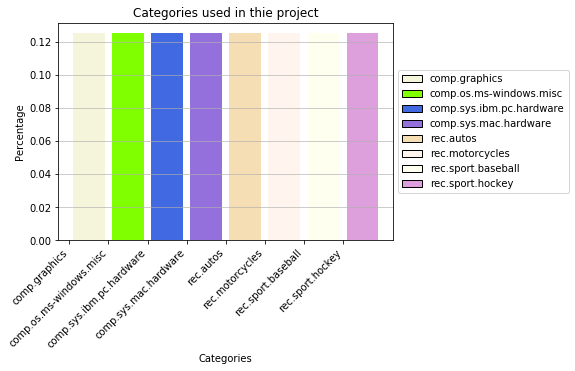

In [7]:
fig, axs = plt.subplots()

colors = ['beige','chartreuse',
          'royalblue', 'mediumpurple',
          'wheat','seashell',
          'ivory','plum',
         ]

xlabels = train_dataset.target_names
n, bins, patches = plt.hist(train_dataset.target_names, bins=8, range = (0,8),density='true', rwidth=0.8)
for i in range(0,len(patches)):
    patches[i].set_facecolor(colors[i])
axs.set_xticks(np.arange(8))
axs.set_xticklabels(xlabels, rotation=45, ha = "right")
#axs.set_xticklabels([], rotation_mode="anchor")

plt.grid(axis='y', alpha=0.8)
handles = [Rectangle((0,0),1,1,color=c,ec="k") for c in colors]
plt.xlabel('Categories')
plt.ylabel('Percentage')
plt.title('Categories used in thie project')
plt.legend(handles,list(train_dataset.target_names),loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig('Q1_2.png', bbox_inches='tight')

In [8]:
train_dataset.target_names

['comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey']

In [9]:
cv = CountVectorizer(stop_words='english', min_df=3)
cv

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=3,
                ngram_range=(1, 1), preprocessor=None, stop_words='english',
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [10]:
wnl = nltk.wordnet.WordNetLemmatizer()
walking_tagged = pos_tag(nltk.word_tokenize('He is walking to school'))
print(walking_tagged)
print("mapping to Verb, Noun, Adjective, Adverbial")

def penn2morphy(penntag):
    """ Converts Penn Treebank tags to WordNet. """
    morphy_tag = {'NN':'n', 'JJ':'a',
                  'VB':'v', 'RB':'r'}
    try:
        return morphy_tag[penntag[:2]]
    except:
        return 'n'

def lemmatize_sent_demo(text):
    # Text input is string, returns array of lowercased strings(words).
    return [wnl.lemmatize(word.lower(), pos=penn2morphy(tag)) 
            for word, tag in pos_tag(nltk.word_tokenize(text))]

[('He', 'PRP'), ('is', 'VBZ'), ('walking', 'VBG'), ('to', 'TO'), ('school', 'NN')]
mapping to Verb, Noun, Adjective, Adverbial


In [11]:
lemmatize_sent_demo('He is walking to school')


['he', 'be', 'walk', 'to', 'school']

In [12]:
import re
from nltk.corpus import stopwords
train_data_lammed = []
for line in train_dataset.data:
    wordlist = lemmatize_sent_demo(line)
    wordlist_cleaned = [re.sub(r"[^\w]", "", word) for word in wordlist]    
    removedtrain = [word for word in wordlist_cleaned if word not in stopwords.words('english') and not word.isdigit()]
    each_line = " ".join(removedtrain)
    train_data_lammed.append(each_line)

In [13]:
train_data_lammed[0]

' andrem  pyrtechmispyramidcom  andre molyneux  subject   lciii  powerpc  replyto  andrem  pyrtechmispyramidcom  andre molyneux  organization  pyramid technology  mt  view  california  line  article  1qksuq  1tt8  halgnuaimitedu   mirsky  halgnuaimitedu  david joshua mirsky  write    hi  lciii recently hear interesting rumor    hear lciii build slot powerpc chip    true  hear slot pd   slot  true      thanks   david mirsky   mirsky  gnuaimitedu well  also lc iii  pop top reveal  one  socket  additional vram simm one  socket  72pin ram simm one socket flatpack fpu processordirect slot  pd  identical lclc ii  additional set connetions one side  full 32bit data path lclc ii lack  guess board powerpc chip could make would fit pd  place                                          andre molyneux ka7wvv  insert favorite disclaimer                                                pyramid technology corp internet         n first street  andrem  pyramidcom        san jose  ca packet            ka7wvv

In [14]:
test_data_lammed = [] 
for line in test_dataset.data:
    wordlist = lemmatize_sent_demo(line)
    wordlist_cleaned = [re.sub(r"[^\w]", "", word) for word in wordlist]    
    removedtest = [word for word in wordlist_cleaned if word not in stopwords.words('english') and not word.isdigit()]
    each_line = " ".join(removedtest)
    test_data_lammed.append(each_line)

In [15]:
test_data_lammed[0]

' povlphp  utsunicdk  povl h pedersen  subject   se30 8bit card work 20mb organization  unic  danish computing centre research education keywords  se30 mode32 system7 pd line   1r4kve  6cl  newscstuberlinde  ossip  cstuberlinde  ossip kaehr  write   se30 generation system 8bit pd card   screen   work great upgrade mb ram   sys71 mode32 32enabler boot  tech support person say card support 32bit  fix  guess right  early version rasterops card either  fix  people problem get free rom upgrade rasterops    press shift key boot  ext  monitor  go black grey  system sometimes boot properly    work ok 20mb full graphic   happen    easy  boot without mode32 control panel  disable  rather reinstall  32bit clean patch  run ok must 24bit adressing mode  check macintosh see havce 12mb system   thank lot advice     please answer mail  send seperately   ossip kaehr  ossip  cstuberlinde  voice     __                                __  _ ossip kaehr hermannstrasse d1000 berlin germany _  _ tel  email os

In [16]:
cv = CountVectorizer(stop_words='english', min_df=3)
training_vectors = cv.fit_transform(train_data_lammed)
testing_vectors = cv.transform(test_data_lammed)

In [17]:
# TF-IDF from notes
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(training_vectors)
X_test_tfidf = tfidf_transformer.transform(testing_vectors)
print(X_train_tfidf.shape)
print(X_test_tfidf.shape)

(4732, 16741)
(3150, 16741)


In [18]:
#store the train and test data into pickle file
import pickle
pickle_out = open("X_train_tfidf.pickle","wb")
pickle.dump(X_train_tfidf, pickle_out)
pickle_out.close()
pickle_out = open("X_test_tfidf.pickle","wb")
pickle.dump(X_test_tfidf, pickle_out)
pickle_out.close()

# Dimension Reduction

### Question 3 Reduce the dimensionality of the data using the LSI and NMF methods, k = 50

In [19]:
import pickle
#extract files:
pickle_in = open("X_train_tfidf.pickle","rb")
train_tfidf_local = pickle.load(pickle_in)
pickle_in = open("X_test_tfidf.pickle","rb")
test_tfidf_local = pickle.load(pickle_in)

In [20]:
#LSI
from sklearn.decomposition import TruncatedSVD
from sklearn.utils.extmath import randomized_svd
k = 50
svd = TruncatedSVD(n_components=k, random_state=42)
X_train_lsi = svd.fit_transform(train_tfidf_local)
X_test_lsi = svd.transform(test_tfidf_local)

# NMF
from sklearn.decomposition import NMF
nmf = NMF(n_components=k, init='random', random_state=42)
W_train_nmf = nmf.fit_transform(train_tfidf_local)
W_test_nmf = nmf.transform(test_tfidf_local)
print('the shape of training data after LSI is:',X_train_lsi.shape)
print('the shape of training data after NMF is:',W_train_nmf.shape)

the shape of training data after LSI is: (4732, 50)
the shape of training data after NMF is: (4732, 50)


compare $||X-WH||^2$ in NMF and $||X-U \Sigma V||^2$ in LSI:

In [21]:
Uk, Sigmak, VTk = randomized_svd(train_tfidf_local, n_components=50, random_state=42)
err_lsi = np.sum(np.array(train_tfidf_local - (Uk.dot(np.diag(Sigmak)).dot(VTk)))**2)
H_train = nmf.components_
err_nmf = np.sum(np.array(train_tfidf_local - W_train_nmf.dot(H_train))**2)
print('the loss for LSI method is:',err_lsi)
print('the loss for NMF method is:',err_nmf)

the loss for LSI method is: 4142.143513443093
the loss for NMF method is: 4177.781665802169


# Classification Algorithms

### QUESTION 4: Hard margin and soft margin linear SVMs:

In [22]:
#data preparation: create two values for 2 classes - 'comp' and 'rec'
len(train_dataset.target) #train_dataset.target contains the category in formation of each documents [0,1,2,3,4,5,7] = 4732
Y_train = []
for document in train_dataset.target:
    CurrCate = train_dataset.target_names[document]
    if CurrCate.startswith('comp'):
        Y_train.append(int(0))   # 0 denotes 'comp' category
    elif CurrCate.startswith('rec'):
        Y_train.append(int(1))   # 1 denotes 'rec' category
    else:
        Y_train.append(int(2))
#np.unique(Y_train)
#len(Y_train)

Y_test = []
for document in test_dataset.target:
    CurrCate = test_dataset.target_names[document]
    if CurrCate.startswith('comp'):
        Y_test.append(int(0))
    elif CurrCate.startswith('rec'):
        Y_test.append(int(1))
    else:
        Y_test.append(int(2))
#np.unique(Y_train)
#len(Y_test)

In [23]:
from sklearn.svm import SVC
#Train one SVM with gamma = 1000 (hard margin), another with gamma = 0:0001 (soft margin):
svc_hard = SVC(C = 1000, kernel = 'linear', random_state = 42).fit(X_train_lsi, Y_train)
svc_soft = SVC(C = 0.0001, kernel = 'linear', random_state = 42).fit(X_train_lsi, Y_train)


In [24]:
#roc plot functions
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
import matplotlib.pyplot as plt
%matplotlib inline
def plot_roc(fpr, tpr):
    fig, ax = plt.subplots()

    roc_auc = auc(fpr,tpr)

    ax.plot(fpr, tpr, lw=2, label= 'area under curve = %0.4f' % roc_auc)

    ax.grid(color='0.7', linestyle='--', linewidth=1)

    ax.set_xlim([-0.1, 1.1])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate',fontsize=15)
    ax.set_ylabel('True Positive Rate',fontsize=15)

    ax.legend(loc="lower right")

    for label in ax.get_xticklabels()+ax.get_yticklabels():
        label.set_fontsize(15)

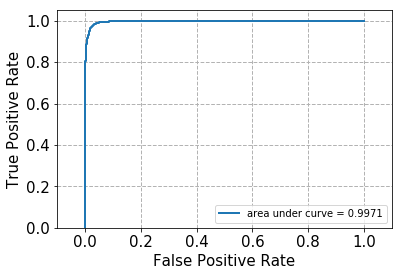

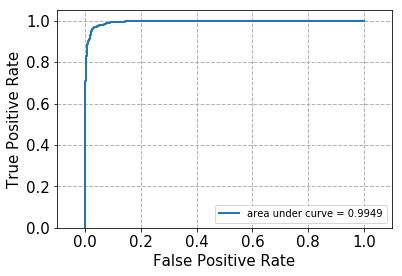

In [25]:
#ROC plot for svm_hard
score_hard = svc_hard.decision_function(X_test_lsi)
#print(len(score_hard))
fpr_hard, tpr_hard, threshold = metrics.roc_curve(Y_test, score_hard)
# draw the ROC for svm_hard
plot_roc(fpr_hard, tpr_hard)
#ROC plot for svm_soft
score_soft = svc_soft.decision_function(X_test_lsi)
#print(len(score_hard))
fpr_soft, tpr_soft, threshold = metrics.roc_curve(Y_test, score_soft)
# draw the ROC for svm_soft
plot_roc(fpr_soft, tpr_soft)

Report the confusion matrix and calculate the Accuracy, Recall, Precision and F-1 score of both SVM classifier

In [59]:
import numpy as np
from matplotlib import pyplot as plt
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues
    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

In [136]:
def EvaluationReport(clf, testset, Y_test, Averagetype, report_title):
    Y_predict = clf.predict(testset)
    cm = confusion_matrix(Y_test, Y_predict)
    np.set_printoptions(precision=2)
    #print('Confusion matrix, without normalization')
    #print(cm)
    plot_confusion_matrix(cm = cm,
                          normalize    = False,
                          target_names = ['Computer Technology','Recreational'],
                          title        = "Confusion Matrix for "  + report_title)
    # Normalize the confusion matrix by row (i.e by the number of samples
    # in each class)
    cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    #print('Normalized confusion matrix')
    #print(cm_normalized)
    plot_confusion_matrix(cm = cm,
                          normalize    = True,
                          target_names = ['Recreational','Computer Technology'],
                          title        = "Normalised Confusion Matrix for " + report_title)  
    accuracy = metrics.accuracy_score(Y_test, Y_predict)
    if Averagetype == '0':
        recall = metrics.recall_score(Y_test, Y_predict)
        precision = metrics.precision_score(Y_test, Y_predict)
        f1_score = metrics.f1_score(Y_test, Y_predict)
    else:
        recall = metrics.recall_score(Y_test, Y_predict, average = Averagetype)
        precision = metrics.precision_score(Y_test, Y_predict, average = Averagetype)
        f1_score = metrics.f1_score(Y_test, Y_predict, average = Averagetype)
    
    #ROC plot for svm_best
    if(clf in {svc_hard,svc_soft,svc_best}):
        Prob_score = clf.decision_function(testset)    #use decision_function for svm
        fpr, tpr, threshold = metrics.roc_curve(Y_test, Prob_score)
    else:
        Prob_score = clf.predict_proba(testset)    #use predict_proba for others
        fpr, tpr, threshold = metrics.roc_curve(Y_test, Prob_score[:,1])
    plot_roc(fpr, tpr)
    print('Other Evaluations for ' + report_title)
    print('Accuracy = {:0.4f}'. format(accuracy))
    print('Recall = {:0.4f}'.format(recall))
    print('Precision = {:0.4f}'.format(precision))
    print('F1_score = {:0.4f}'.format(f1_score))

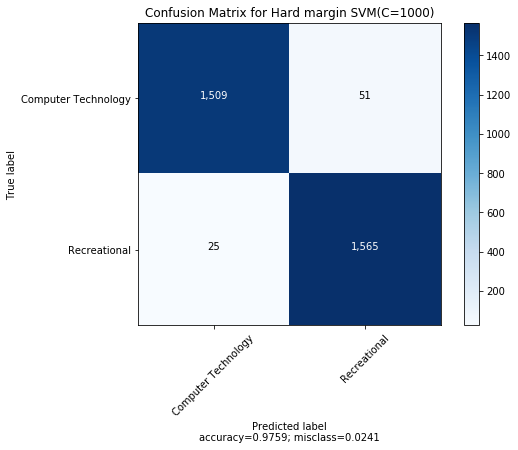

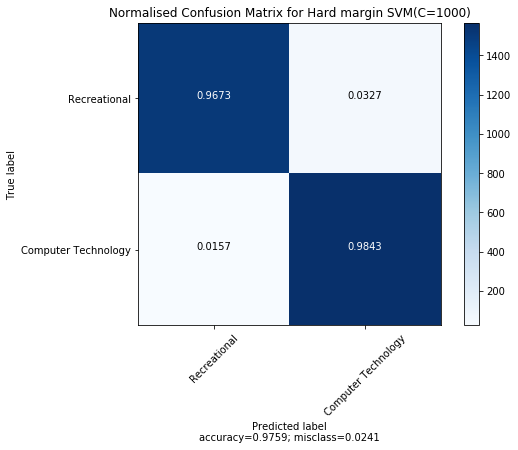

Other Evaluations for Hard margin SVM(C=1000)
Accuracy = 0.9759
Recall = 0.9843
Precision = 0.9684
F1_score = 0.9763


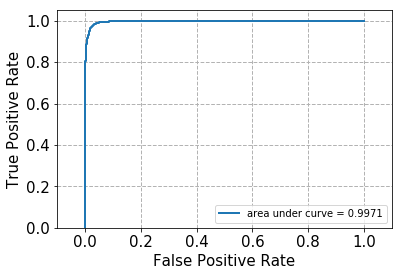

In [137]:
EvaluationReport(svc_hard, X_test_lsi,Y_test,'0','Hard margin SVM(C=1000)')

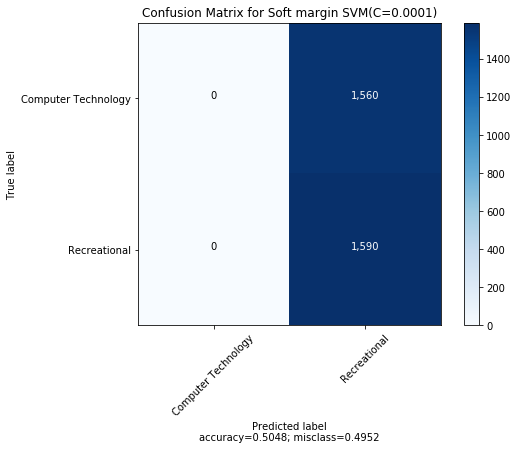

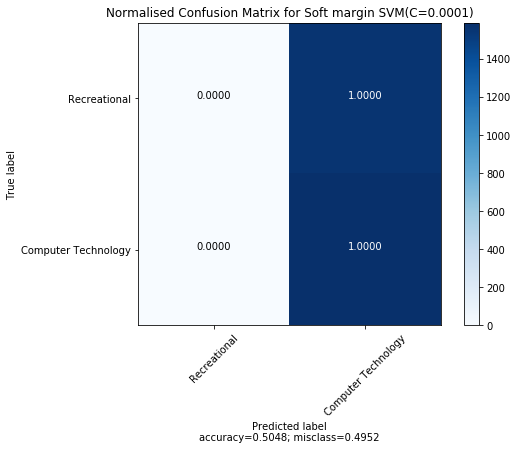

Other Evaluations for Soft margin SVM(C=0.0001)
Accuracy = 0.5048
Recall = 1.0000
Precision = 0.5048
F1_score = 0.6709


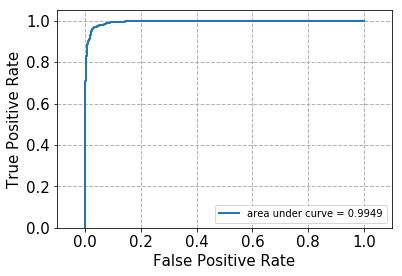

In [138]:
EvaluationReport(svc_soft, X_test_lsi,Y_test,'0','Soft margin SVM(C=0.0001)')

#### Use 5-fold cross-validation to choose (use average validation accuracy to compare), use c from 10e-3 ~ 10e3

In [139]:
from sklearn.model_selection import cross_val_score
SVM_scores = []
for k in range(-3, 4):
    SVM_clf = SVC(C = 10**k, kernel = 'linear', random_state = 42).fit(X_train_lsi, Y_train)
    SVM_scores.append(cross_val_score(SVM_clf, X_train_lsi, Y_train, cv=5, scoring='accuracy'))
SVM_averaged = [np.average(data) for data in SVM_scores]
SVM_averaged

[0.5048605721693318,
 0.5065512348196959,
 0.9666138207534539,
 0.9729520756332475,
 0.9780247333303496,
 0.9795035334653713,
 0.9788710709282405]

In [140]:
max_SVMscore = np.max(SVM_averaged)
max_SVMindex = SVM_averaged.index(max_SVMscore)
C_best = 10**(range(-3,4)[max_SVMindex])
print('when C = '+str(C_best)+', highest accuracy is achieved.')

when C = 100, highest accuracy is achieved.


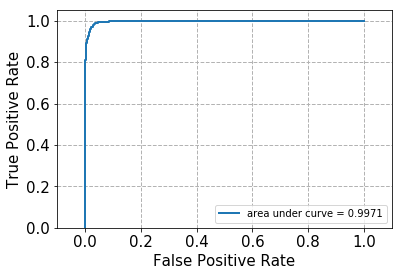

In [141]:
svc_best = SVC(C = C_best, kernel = 'linear', random_state = 42).fit(X_train_lsi, Y_train)
#ROC plot for svm_best
score_best = svc_best.decision_function(X_test_lsi)
#print(len(score_best))
fpr_best, tpr_best, threshold = metrics.roc_curve(Y_test, score_best)
# draw the ROC for svm_best
plot_roc(fpr_best, tpr_best)

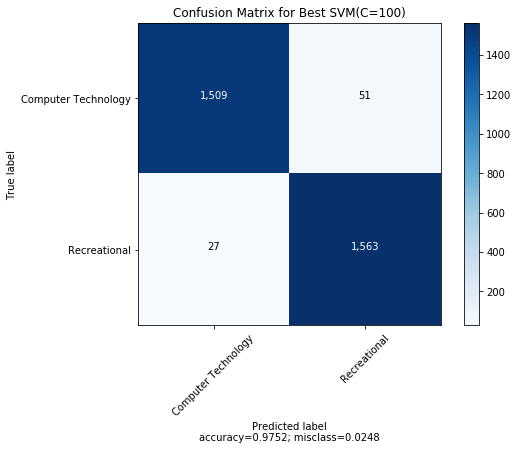

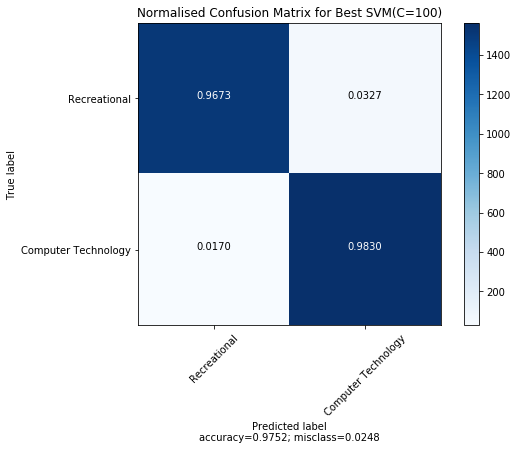

Other Evaluations for Best SVM(C=100)
Accuracy = 0.9752
Recall = 0.9830
Precision = 0.9684
F1_score = 0.9757


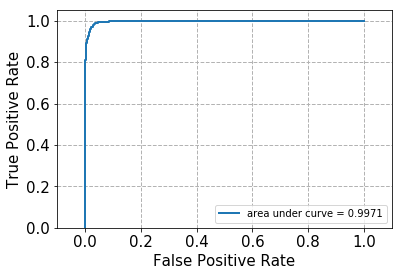

In [142]:
#evaluate the highest accuracy model.
svc_best = SVC(C = C_best, kernel = 'linear', random_state = 42).fit(X_train_lsi, Y_train)
EvaluationReport(svc_best, X_test_lsi,Y_test,'0','Best SVM(C=100)')

# Question 5 Logistic Regression (WCY)

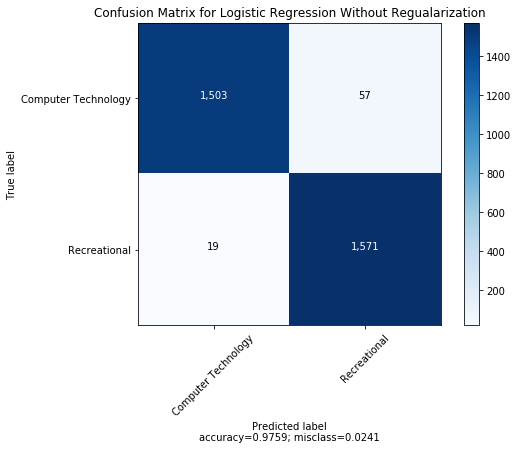

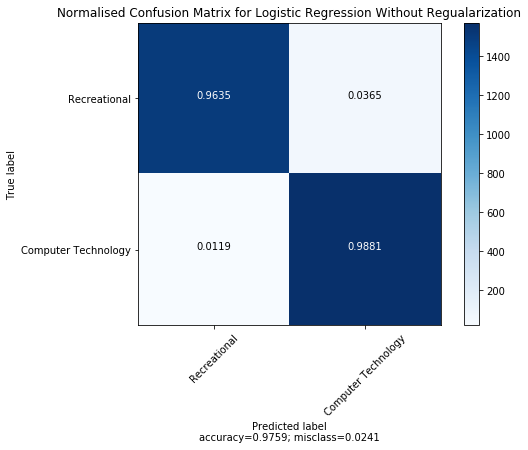

Other Evaluations for Logistic Regression Without Regualarization
Accuracy = 0.9759
Recall = 0.9881
Precision = 0.9650
F1_score = 0.9764


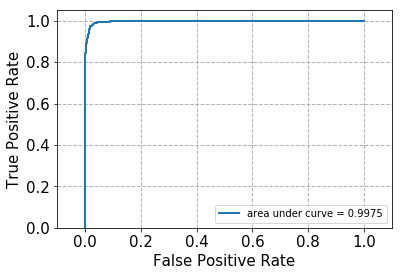

In [143]:
from sklearn.linear_model import LogisticRegression
# wo is the notion for w/o(without regularization) in the project1 document
LR_wo = LogisticRegression(penalty='l2',solver='liblinear',C = 1e9)   # use a large number of C as 1e9 to approximate none regularization
clf_LR_wo = LR_wo.fit(X_train_lsi, Y_train)

EvaluationReport(clf_LR_wo, X_test_lsi, Y_test, '0','Logistic Regression Without Regualarization')

#### 5-fold cross-validation

In [207]:
import pandas as pd
from sklearn.model_selection import cross_val_score
gamma = [10**(-3), 10**(-2), 10**(-1), 10**0, 10**1, 10**2, 10**3]

Coef_matrix_temp = []
L1_scores = []
for i in range(7):
    LR_wL1 = LogisticRegression(penalty='l1',solver='liblinear',C = gamma[i])   
    L1_scores.append(cross_val_score(LR_wL1, X_train_lsi, Y_train, cv=5, scoring='accuracy'))
    clf_L1 = LR_wL1.fit(X_train_lsi, Y_train)
    Coef_matrix_temp.append(clf_L1.coef_)

L1_averaged = [np.average(data) for data in L1_scores]
#L1_averaged
#Coef_L1 = pd.DataFrame(Coef_matrix)
Coef_matrix = []
for sub_list in Coef_matrix_temp:
    for subsub_list in sub_list:
        Coef_matrix.append(subsub_list)
Coef_matrix
#Coef_L1 = pd.DataFrame(Coef_matrix)
#EvaluationReport(LR_wo, X_test_lsi, Y_test, '0','Logistic Regression Without Regualarization')

[array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0.  , 5.81, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]),
 array([  0.  ,  42.58,   5.14, -11.63,   0.  ,   0.  ,   0.  ,   0.  ,
          0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,
          0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,
          0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,
          0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,
          0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,


In [208]:
Coef2_matrix_temp = []
L2_scores = []
for i in range(7):
    LR_wL2 = LogisticRegression(penalty='l2',solver='liblinear',C = gamma[i])   
    L2_scores.append(cross_val_score(LR_wL2, X_train_lsi, Y_train, cv=5, scoring='accuracy'))
    clf_L2 = LR_wL2.fit(X_train_lsi, Y_train)
    Coef2_matrix_temp.append(clf_L2.coef_)

L2_averaged = [np.average(data) for data in L2_scores]
#L1_averaged
#Coef_L1 = pd.DataFrame(Coef_matrix)
Coef2_matrix = []
for sub_list in Coef2_matrix_temp:
    for subsub_list in sub_list:
        Coef2_matrix.append(subsub_list)
Coef2_matrix

[array([-9.99e-03,  1.44e-01,  3.60e-02, -4.36e-02,  4.56e-03,  1.52e-02,
         1.60e-02, -5.58e-03, -1.87e-03, -1.41e-02, -5.55e-03,  1.83e-04,
        -1.72e-03,  9.00e-03,  5.85e-03,  1.03e-03,  9.99e-03, -4.58e-03,
        -2.70e-03,  1.71e-03,  6.90e-03,  5.00e-03, -7.50e-04, -6.47e-04,
         9.17e-04,  2.77e-03, -2.79e-03, -2.55e-03,  1.17e-03, -2.79e-03,
         1.30e-03, -3.15e-05,  5.72e-03,  3.19e-05,  5.07e-05, -3.99e-03,
         7.26e-04, -1.06e-03, -5.93e-04, -1.16e-04, -3.73e-03,  2.28e-03,
        -1.01e-03,  1.64e-03, -1.25e-03, -8.06e-04,  3.01e-03, -2.28e-04,
         2.82e-03, -1.72e-03]),
 array([-1.03e-01,  1.34e+00,  3.43e-01, -4.16e-01,  4.39e-02,  1.48e-01,
         1.55e-01, -5.43e-02, -1.81e-02, -1.37e-01, -5.41e-02,  2.44e-03,
        -1.65e-02,  8.75e-02,  5.69e-02,  1.02e-02,  9.75e-02, -4.52e-02,
        -2.64e-02,  1.67e-02,  6.78e-02,  4.86e-02, -7.30e-03, -6.04e-03,
         8.96e-03,  2.71e-02, -2.75e-02, -2.48e-02,  1.13e-02, -2.71e-02,
      

### We achieve the best accuracy at the regularization strength of 1/10^1 = 0.1 while using L1 regularization

In [145]:
L2_scores = []
for i in range(7):
    LR_wL2 = LogisticRegression(penalty='l2',solver='liblinear',C = gamma[i])   
    L2_scores.append(cross_val_score(LR_wL2, X_train_lsi, Y_train, cv=5, scoring='accuracy'))
L2_averaged = [np.average(data) for data in L2_scores]
L2_averaged

[0.7147079384711075,
 0.9480174212867418,
 0.9649213697513102,
 0.9706278327849507,
 0.9756993742387028,
 0.9782348103288159,
 0.9771786208710646]

### We achieve the best accuracy at the regularization strength of 1/10^2 = 0.01 while using L2 regularization

#### best model selected above

In [ ]:
print(clf_L1.coef_)

[[-8.56e-01  1.07e+02  3.94e+01 -6.00e+01 -2.01e+00  2.47e+01  3.30e+01
   1.16e+00 -1.37e+00 -2.54e+01 -6.57e+00 -1.25e+01 -6.31e+00  1.75e+01
   1.74e+01 -1.42e+01  1.18e+01 -3.38e+00 -9.47e+00  6.65e+00  2.22e+01
   8.03e-02  0.00e+00 -3.53e+00  4.57e+00  1.06e+01 -2.76e+00 -2.24e+00
  -1.11e+00  0.00e+00  3.70e+00  5.89e+00  1.26e+01  1.85e+00  0.00e+00
  -4.72e+00  1.04e+00  0.00e+00 -7.40e+00 -1.41e+00 -8.50e+00 -3.51e+00
   0.00e+00  3.83e-01 -6.52e+00  0.00e+00  5.37e+00 -1.30e+00  0.00e+00
  -7.81e+00]]


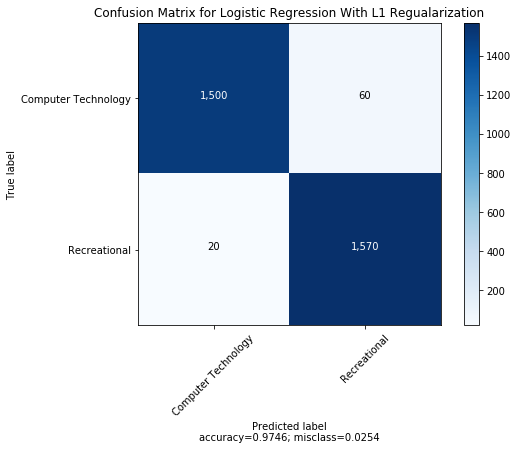

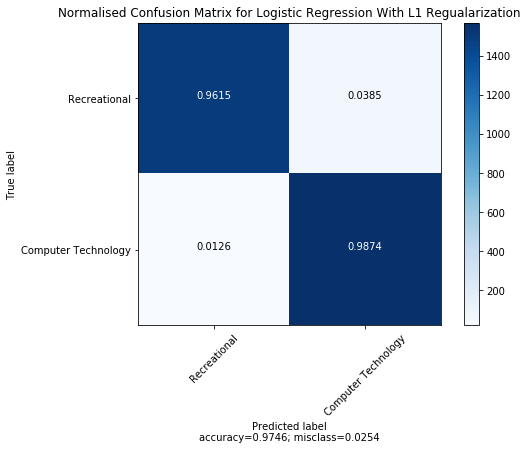

Other Evaluations for Logistic Regression With L1 Regualarization
Accuracy = 0.9746
Recall = 0.9874
Precision = 0.9632
F1_score = 0.9752


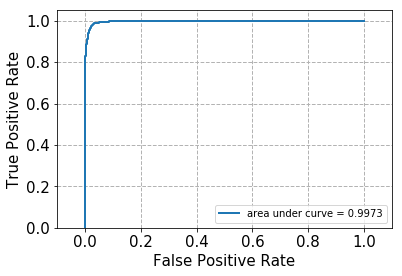

In [185]:
LR_wL1 = LogisticRegression(penalty='l1',solver='liblinear',C = 10)   
clf_L1 = LR_wL1.fit(X_train_lsi, Y_train)
EvaluationReport(clf_L1, X_test_lsi, Y_test, '0','Logistic Regression With L1 Regualarization')

[[ -1.19  85.11  31.05 -45.66  -0.39  19.97  24.62   1.58  -2.71 -19.73
   -6.43  -8.59  -5.4   14.97  12.37 -10.16  13.4   -7.06  -7.52   6.93
   14.95   2.59  -0.31  -3.46   4.25   8.58  -4.8   -2.53  -1.84  -0.8
    4.05   4.38  10.6    2.56   0.56  -4.8    2.78  -1.55  -5.77  -2.29
   -7.46  -2.93  -0.2    0.86  -4.57   0.72   5.56  -2.89   2.6   -6.6 ]]


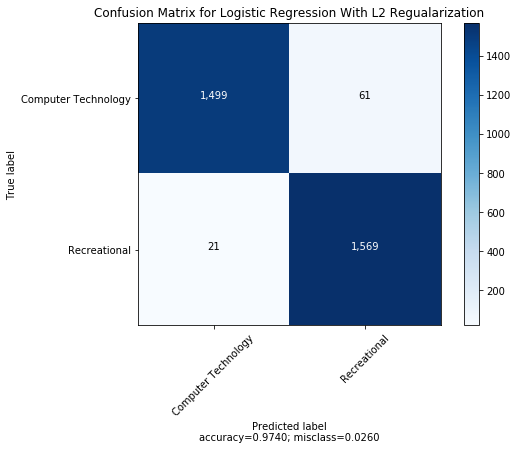

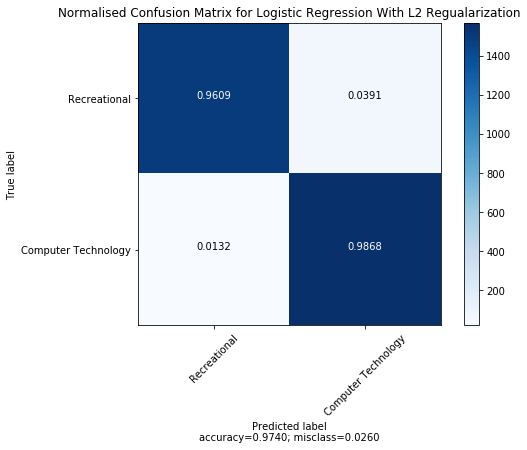

Other Evaluations for Logistic Regression With L2 Regualarization
Accuracy = 0.9740
Recall = 0.9868
Precision = 0.9626
F1_score = 0.9745


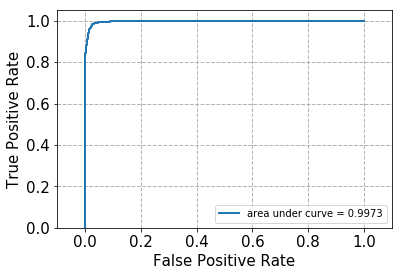

In [186]:
LR_wL2 = LogisticRegression(penalty='l2',solver='liblinear',C = 100)   
clf_L2 = LR_wL2.fit(X_train_lsi, Y_train)
print(clf_L2.coef_)
EvaluationReport(clf_L2, X_test_lsi, Y_test, '0','Logistic Regression With L2 Regualarization')

# Question 6 Naive Bayes classifier (XH)

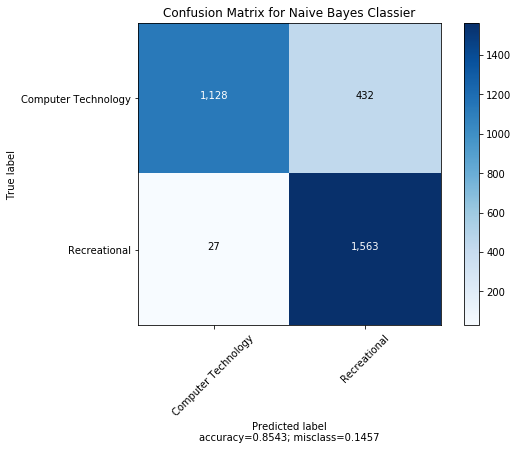

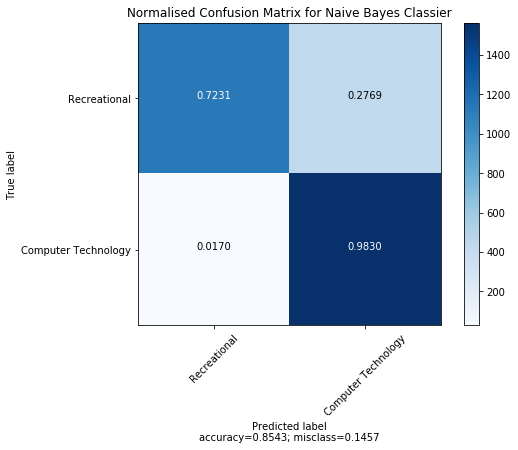

Other Evaluations for Naive Bayes Classier
Accuracy = 0.8543
Recall = 0.9830
Precision = 0.7835
F1_score = 0.8720


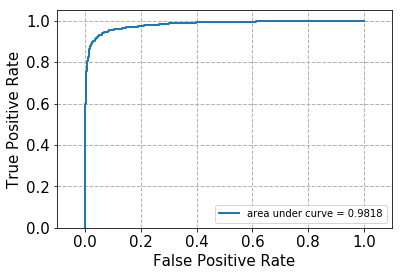

In [148]:
from sklearn.naive_bayes import GaussianNB
clf_NB = GaussianNB().fit(X_train_lsi, Y_train)
EvaluationReport(clf_NB, X_test_lsi, Y_test, '0','Naive Bayes Classier')

In [149]:
from sklearn.pipeline import Pipeline
pipeline_soft_svc = Pipeline([
    ('feature extraction', CountVectorizer(stop_words='english', min_df=3)),
    ('TF_IDF', TfidfTransformer()),
    ('dim reduction', TruncatedSVD(n_components=k, random_state=42)),
    ('classification', svc_soft)
])

# Question 7 Grid Search of Parameters

In [150]:
#example from discussion
from sklearn.pipeline import Pipeline
pipeline = Pipeline([
    ('vect', CountVectorizer(min_df=1, stop_words='english')),
    ('tfidf', TfidfTransformer()),
    ('reduce_dim', TruncatedSVD(n_components=50, random_state=42)),
    ('clf', GaussianNB()),
])
pipeline.fit(train_dataset.data, train_dataset.target)
predict = pipeline.predict(test_dataset.data)
print("accuracy:{}".format(accuracy_score(test_dataset.target, predict)))

accuracy:0.6253968253968254


In [151]:
# preparing data: perform grid search on four different sets of data: 
    #1. headremoved, lemmatized
    #2. headremoved, not lemmatized
    #3. head not removed, lemmatized
    #4. head not removed, not lemmatized
train_dataset_headerremoved = fetch_20newsgroups(subset = 'train', categories = categories, shuffle=True,random_state=None, remove=['headers', 'footers'])
test_dataset_headerremoved = fetch_20newsgroups(subset = 'test', categories = categories, shuffle=True,random_state=None,  remove=['headers', 'footers'])

In [155]:
import re
from nltk.corpus import stopwords
train_dataset_headerremoved_lammed = []
for line in train_dataset_headerremoved.data:
    wordlist = lemmatize_sent_demo(line)
    wordlist_cleaned = [re.sub(r"[^\w]", "", word) for word in wordlist]    
    removedtrain = [word for word in wordlist_cleaned if word not in stopwords.words('english') and not word.isdigit()]
    each_line = " ".join(removedtrain)
    train_dataset_headerremoved_lammed.append(each_line)

In [156]:
len(train_dataset_headerremoved_lammed)

4732

In [157]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.decomposition import TruncatedSVD, NMF
# used to cache results
from tempfile import mkdtemp
from shutil import rmtree
from sklearn.externals.joblib import Memory
# print(__doc__)
cachedir = mkdtemp()
memory = Memory(cachedir=cachedir, verbose=10)

pipeline = Pipeline([
    ('vect', CountVectorizer(min_df=1, stop_words='english')),
    ('tfidf', TfidfTransformer()),
    ('reduce_dim', TruncatedSVD(random_state=42)),
    ('clf', GaussianNB()),
],
memory=memory
)

#MIN_DF_OPTIONS = [3, 5]     #min_df 3 vs 5
#N_FEATURES_OPTIONS = [50]
#C_OPTIONS = [100]     #SVM with C = 100
#REG_OPTIONS = ['l1', 'l2']     #l1 with 0.1 strength and l2 with 0.01 strength
#REG_STRENGTH_OPTIONS = [0.1, 0.01]

param_grid = [
    {
        'vect': [
            CountVectorizer(min_df=3, stop_words='english'),
            CountVectorizer(min_df=5, stop_words='english'),
        ],
        'reduce_dim': [TruncatedSVD(n_components=50, random_state=42),
                       NMF(n_components=50, init='random', random_state=42)
        ],
        'clf': [SVC(kernel='linear', C=100, random_state=42),
                LogisticRegression(penalty='l1', C=10, random_state=42),
                LogisticRegression(penalty='l2', C=100, random_state=42),
                GaussianNB()
        ]
    }
]



C:\Users\SANDS\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: DeprecationWarning: The 'cachedir' parameter has been deprecated in version 0.12 and will be removed in version 0.14.
You provided "cachedir='C:\\Users\\SANDS\\AppData\\Local\\Temp\\tmpjb09h9fn'", use "location='C:\\Users\\SANDS\\AppData\\Local\\Temp\\tmpjb09h9fn'" instead.
  del sys.path[0]


In [163]:
# Perform grid search on train_data_lammed, train_dataset, train_dataset_headerremoved, train_dataset_headerremoved_lammed
grid = GridSearchCV(pipeline, cv=5, n_jobs=1, param_grid=param_grid, scoring='accuracy')
grid.fit(train_dataset.data, Y_train) # with header, no lamm
rmtree(cachedir)

________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=3,
                ngram_range=(1, 1), preprocessor=None, stop_words='english',
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None), 
[ 'From: whiles@nswc.navy.mil (William Scott Hiles x1568)\n'
  'Subject: Re: Tape Drive Problems\n'
  'Reply-To: whiles@nswc.navy.mil\n'
  'Organization: Naval Surface Warfare Center, Dahlgren Division\n'
  'Lines: 62\n'
  '\n'
  'In article 489@ux1.cso.uiuc.edu, husak@ux1.cso.uiuc.edu (Stephen R. Husak ) '
  'writes:\n'
  '>Please reply via e-mail since this is job related: \n'
  '>\n'
  '>I have a Colorado Jumbo back

C:\Users\SANDS\Anaconda3\lib\site-packages\sklearn\pipeline.py:317: UserWarning: Persisting input arguments took 1.57s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **fit_params_steps[name])


________________________________________________fit_transform_one - 1.5s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True), <3785x17497 sparse matrix of type '<class 'numpy.int64'>'
	with 329496 stored elements in Compressed Sparse Row format>, 
[ 0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  1,
  1,
  0,
  1,
  0,
  0,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  0,
  0,
  1,
  1,
  0,
  1,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  1,
  1,
  1,
  1,
  0,
  0,
  0,
  1,
  0,
  1,
  1,
  0,
  1,
  0,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  1,
  1,
  1,
  0,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  1,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  0,
  0,
 

C:\Users\SANDS\Anaconda3\lib\site-packages\sklearn\pipeline.py:317: UserWarning: Persisting input arguments took 1.55s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **fit_params_steps[name])


________________________________________________fit_transform_one - 1.5s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True), <3785x17481 sparse matrix of type '<class 'numpy.int64'>'
	with 326194 stored elements in Compressed Sparse Row format>, 
[ 0,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  1,
  0,
  1,
  1,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  1,
  1,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  1,
  1,
  0,
  1,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  1,
  1,
  0,
  0,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  0,
  1,
  0,
  1,
  1,
  1,
  0,
  0,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  1,
  1,
  1,
 

C:\Users\SANDS\Anaconda3\lib\site-packages\sklearn\pipeline.py:317: UserWarning: Persisting input arguments took 1.52s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **fit_params_steps[name])


________________________________________________fit_transform_one - 1.5s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True), <3785x17279 sparse matrix of type '<class 'numpy.int64'>'
	with 327046 stored elements in Compressed Sparse Row format>, 
[ 0,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  1,
  0,
  1,
  1,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  1,
  1,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  1,
  1,
  0,
  1,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  1,
  1,
  0,
  0,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  0,
  1,
  0,
  1,
  1,
  1,
  0,
  0,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  1,
  1,
  1,
 

C:\Users\SANDS\Anaconda3\lib\site-packages\sklearn\pipeline.py:317: UserWarning: Persisting input arguments took 1.57s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **fit_params_steps[name])


________________________________________________fit_transform_one - 1.5s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True), <3786x17284 sparse matrix of type '<class 'numpy.int64'>'
	with 324758 stored elements in Compressed Sparse Row format>, 
[ 0,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  1,
  0,
  1,
  1,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  1,
  1,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  1,
  1,
  0,
  1,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  1,
  1,
  0,
  0,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  0,
  1,
  0,
  1,
  1,
  1,
  0,
  0,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  1,
  1,
  1,
 

C:\Users\SANDS\Anaconda3\lib\site-packages\sklearn\pipeline.py:317: UserWarning: Persisting input arguments took 1.60s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **fit_params_steps[name])


________________________________________________fit_transform_one - 1.5s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True), <3787x17667 sparse matrix of type '<class 'numpy.int64'>'
	with 330448 stored elements in Compressed Sparse Row format>, 
[ 0,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  1,
  0,
  1,
  1,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  1,
  1,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  1,
  1,
  0,
  1,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  1,
  1,
  0,
  0,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  0,
  1,
  0,
  1,
  1,
  1,
  0,
  0,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  1,
  1,
  1,
 

C:\Users\SANDS\Anaconda3\lib\site-packages\sklearn\pipeline.py:317: UserWarning: Persisting input arguments took 1.00s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **fit_params_steps[name])


________________________________________________fit_transform_one - 1.4s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True), <3785x11142 sparse matrix of type '<class 'numpy.int64'>'
	with 308018 stored elements in Compressed Sparse Row format>, 
[ 0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  1,
  1,
  0,
  1,
  0,
  0,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  0,
  0,
  1,
  1,
  0,
  1,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  1,
  1,
  1,
  1,
  0,
  0,
  0,
  1,
  0,
  1,
  1,
  0,
  1,
  0,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  1,
  1,
  1,
  0,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  1,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  0,
  0,
 

C:\Users\SANDS\Anaconda3\lib\site-packages\sklearn\pipeline.py:317: UserWarning: Persisting input arguments took 1.05s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **fit_params_steps[name])


________________________________________________fit_transform_one - 1.4s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True), <3785x10997 sparse matrix of type '<class 'numpy.int64'>'
	with 304402 stored elements in Compressed Sparse Row format>, 
[ 0,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  1,
  0,
  1,
  1,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  1,
  1,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  1,
  1,
  0,
  1,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  1,
  1,
  0,
  0,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  0,
  1,
  0,
  1,
  1,
  1,
  0,
  0,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  1,
  1,
  1,
 

C:\Users\SANDS\Anaconda3\lib\site-packages\sklearn\pipeline.py:317: UserWarning: Persisting input arguments took 1.05s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **fit_params_steps[name])


________________________________________________fit_transform_one - 1.4s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True), <3785x10961 sparse matrix of type '<class 'numpy.int64'>'
	with 305704 stored elements in Compressed Sparse Row format>, 
[ 0,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  1,
  0,
  1,
  1,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  1,
  1,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  1,
  1,
  0,
  1,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  1,
  1,
  0,
  0,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  0,
  1,
  0,
  1,
  1,
  1,
  0,
  0,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  1,
  1,
  1,
 

C:\Users\SANDS\Anaconda3\lib\site-packages\sklearn\pipeline.py:317: UserWarning: Persisting input arguments took 1.05s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **fit_params_steps[name])


________________________________________________fit_transform_one - 1.3s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True), <3786x10934 sparse matrix of type '<class 'numpy.int64'>'
	with 303393 stored elements in Compressed Sparse Row format>, 
[ 0,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  1,
  0,
  1,
  1,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  1,
  1,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  1,
  1,
  0,
  1,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  1,
  1,
  0,
  0,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  0,
  1,
  0,
  1,
  1,
  1,
  0,
  0,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  1,
  1,
  1,
 

C:\Users\SANDS\Anaconda3\lib\site-packages\sklearn\pipeline.py:317: UserWarning: Persisting input arguments took 1.09s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **fit_params_steps[name])


________________________________________________fit_transform_one - 1.4s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True), <3787x11185 sparse matrix of type '<class 'numpy.int64'>'
	with 308594 stored elements in Compressed Sparse Row format>, 
[ 0,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  1,
  0,
  1,
  1,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  1,
  1,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  1,
  1,
  0,
  1,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  1,
  1,
  0,
  0,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  0,
  1,
  0,
  1,
  1,
  1,
  0,
  0,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  1,
  1,
  1,
 

_______________________________________________fit_transform_one - 14.7s, 0.2min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\e9c0ced997e641f84a8fccd5977bee11
___________________________________fit_transform_one cache loaded - 0.2s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\89fa04bf97e1b7f84eb59707ed5993db
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(NMF(alpha=0.0, beta_loss='frobenius', init='random', l1_ratio=0.0, max_iter=200,
    n_components=50, random_state=42, shuffle=False, solver='cd', tol=0.0001,
    verbose=0), 
<3787x17667 sparse matrix of type '<class 'numpy.float64'>'
	with

________________________________________________fit_transform_one - 8.6s, 0.1min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\4d4b5a5ad2d62da433d9cd5d3b718dbd
___________________________________fit_transform_one cache loaded - 0.2s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\6d5671a7ef3cee5bb70d6e67c33fb8b5
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(NMF(alpha=0.0, beta_loss='frobenius', init='random', l1_ratio=0.0, max_iter=200,
    n_components=50, random_state=42, shuffle=False, solver='cd', tol=0.0001,
    verbose=0), 
<3787x11185 sparse matrix of type '<class 'numpy.float64'>'
	with

C:\Users\SANDS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\d690af9ef408221627c2b27a2e19b8c3
___________________________________fit_transform_one cache loaded - 0.2s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\78293fa99d54e64e9d95fc96f485570f
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\73e2bee6eea1240683aa6e3ff463ae18
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


C:\Users\SANDS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\2335ce5bcabf64e262c3742dcfaa5249
___________________________________fit_transform_one cache loaded - 0.2s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\953e3cbcbf0b4c56584fc5db80cdddd4
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\f49e81a82c3376aab976634b2cb046a5
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


C:\Users\SANDS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\f36216b68e0af5966080de7ad0c83bd6
___________________________________fit_transform_one cache loaded - 0.2s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\c742d659898c40608b2f480fa02f570a
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\fca54caa7f73a824aedf059903fdf1f0
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


C:\Users\SANDS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\e9c0ced997e641f84a8fccd5977bee11
___________________________________fit_transform_one cache loaded - 0.2s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\89fa04bf97e1b7f84eb59707ed5993db
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\d80d410fad9ece7e0f61e6f15580133e
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


C:\Users\SANDS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\d9e7672a8f90e42f46cb9a77d2c79cbc
___________________________________fit_transform_one cache loaded - 0.1s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\380fcd98fddcedde8596fd89e8b49b1d
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\69d571a47c583b3e9f542374e0e3734a
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


C:\Users\SANDS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\74e04ae2f2a95e1ca6be7ab6c945ed05
___________________________________fit_transform_one cache loaded - 0.1s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\dca88290e126514b5789aeae38e4cc10
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\14df6bcc4aeea4b0e81dedfa107bee6c
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


C:\Users\SANDS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\2ffac9719cf557bde1744eb425678c0e
___________________________________fit_transform_one cache loaded - 0.1s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\717abacb3dd07f7a42e524b770f0caa7
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\31ad14165c39b39557d0bb1ca0de9727
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


C:\Users\SANDS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\bfcaa45c8e80fdf0b06822b493525435
___________________________________fit_transform_one cache loaded - 0.1s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\7d63eb7e1f474d2817ff2364cb5bb545
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\dd86fa868c82000e5c2828f70d87236c
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


C:\Users\SANDS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\4d4b5a5ad2d62da433d9cd5d3b718dbd
___________________________________fit_transform_one cache loaded - 0.2s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\6d5671a7ef3cee5bb70d6e67c33fb8b5
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\10a5d2eb522e55823e79548e983c39d5
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


C:\Users\SANDS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\a5505fd9c22514f66f4727620a45d55d
___________________________________fit_transform_one cache loaded - 0.2s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\a71ca6596110cade752c6d8b68917a26
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\c9711bb0dd222c6bc86d295b02304c22
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


C:\Users\SANDS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\d690af9ef408221627c2b27a2e19b8c3
___________________________________fit_transform_one cache loaded - 0.2s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\78293fa99d54e64e9d95fc96f485570f
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\04b41c299eed43cc51a37256fb9a4902
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


C:\Users\SANDS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\2335ce5bcabf64e262c3742dcfaa5249
___________________________________fit_transform_one cache loaded - 0.2s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\953e3cbcbf0b4c56584fc5db80cdddd4
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\462a51cf8f3a7c5d5342f93d8c0785b2
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


C:\Users\SANDS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\f36216b68e0af5966080de7ad0c83bd6
___________________________________fit_transform_one cache loaded - 0.2s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\c742d659898c40608b2f480fa02f570a
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\7e4c6d42c81081ce5edeb3083fd9242d
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


C:\Users\SANDS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\e9c0ced997e641f84a8fccd5977bee11
___________________________________fit_transform_one cache loaded - 0.2s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\89fa04bf97e1b7f84eb59707ed5993db
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\1238da7856bc385951fe9bd6f3eab588
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


C:\Users\SANDS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\d9e7672a8f90e42f46cb9a77d2c79cbc
___________________________________fit_transform_one cache loaded - 0.1s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\380fcd98fddcedde8596fd89e8b49b1d
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\2fcf8d428f310634ca92adf3642450c2
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


C:\Users\SANDS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\74e04ae2f2a95e1ca6be7ab6c945ed05
___________________________________fit_transform_one cache loaded - 0.1s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\dca88290e126514b5789aeae38e4cc10
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\50c80eb7f0473794758367a332da01f3
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


C:\Users\SANDS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\2ffac9719cf557bde1744eb425678c0e
___________________________________fit_transform_one cache loaded - 0.1s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\717abacb3dd07f7a42e524b770f0caa7
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\ad1eb10d2bb49d8756dba4ac2d720cca
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


C:\Users\SANDS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\bfcaa45c8e80fdf0b06822b493525435
___________________________________fit_transform_one cache loaded - 0.1s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\7d63eb7e1f474d2817ff2364cb5bb545
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\556a60e6e91d8d4a072b058c775f4f87
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


C:\Users\SANDS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\4d4b5a5ad2d62da433d9cd5d3b718dbd
___________________________________fit_transform_one cache loaded - 0.2s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\6d5671a7ef3cee5bb70d6e67c33fb8b5
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\1d411ddd881b19411f4c2f22e5ec7f77
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


C:\Users\SANDS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\a5505fd9c22514f66f4727620a45d55d
___________________________________fit_transform_one cache loaded - 0.2s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\a71ca6596110cade752c6d8b68917a26
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\aa2801f7801e8880c27e5eca445b7557
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


C:\Users\SANDS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\d690af9ef408221627c2b27a2e19b8c3
___________________________________fit_transform_one cache loaded - 0.2s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\78293fa99d54e64e9d95fc96f485570f
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\73e2bee6eea1240683aa6e3ff463ae18
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


C:\Users\SANDS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\2335ce5bcabf64e262c3742dcfaa5249
___________________________________fit_transform_one cache loaded - 0.2s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\953e3cbcbf0b4c56584fc5db80cdddd4
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\f49e81a82c3376aab976634b2cb046a5
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


C:\Users\SANDS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\f36216b68e0af5966080de7ad0c83bd6
___________________________________fit_transform_one cache loaded - 0.2s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\c742d659898c40608b2f480fa02f570a
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\fca54caa7f73a824aedf059903fdf1f0
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


C:\Users\SANDS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\e9c0ced997e641f84a8fccd5977bee11
___________________________________fit_transform_one cache loaded - 0.2s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\89fa04bf97e1b7f84eb59707ed5993db
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\d80d410fad9ece7e0f61e6f15580133e
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


C:\Users\SANDS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\d9e7672a8f90e42f46cb9a77d2c79cbc
___________________________________fit_transform_one cache loaded - 0.1s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\380fcd98fddcedde8596fd89e8b49b1d
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\69d571a47c583b3e9f542374e0e3734a
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


C:\Users\SANDS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\74e04ae2f2a95e1ca6be7ab6c945ed05
___________________________________fit_transform_one cache loaded - 0.2s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\dca88290e126514b5789aeae38e4cc10
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\14df6bcc4aeea4b0e81dedfa107bee6c
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


C:\Users\SANDS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\2ffac9719cf557bde1744eb425678c0e
___________________________________fit_transform_one cache loaded - 0.1s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\717abacb3dd07f7a42e524b770f0caa7
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\31ad14165c39b39557d0bb1ca0de9727
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


C:\Users\SANDS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\bfcaa45c8e80fdf0b06822b493525435
___________________________________fit_transform_one cache loaded - 0.1s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\7d63eb7e1f474d2817ff2364cb5bb545
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\dd86fa868c82000e5c2828f70d87236c
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


C:\Users\SANDS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\4d4b5a5ad2d62da433d9cd5d3b718dbd
___________________________________fit_transform_one cache loaded - 0.1s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\6d5671a7ef3cee5bb70d6e67c33fb8b5
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\10a5d2eb522e55823e79548e983c39d5
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


C:\Users\SANDS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\a5505fd9c22514f66f4727620a45d55d
___________________________________fit_transform_one cache loaded - 0.2s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\a71ca6596110cade752c6d8b68917a26
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\c9711bb0dd222c6bc86d295b02304c22
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


C:\Users\SANDS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\d690af9ef408221627c2b27a2e19b8c3
___________________________________fit_transform_one cache loaded - 0.2s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\78293fa99d54e64e9d95fc96f485570f
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\04b41c299eed43cc51a37256fb9a4902
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


C:\Users\SANDS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\2335ce5bcabf64e262c3742dcfaa5249
___________________________________fit_transform_one cache loaded - 0.2s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\953e3cbcbf0b4c56584fc5db80cdddd4
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\462a51cf8f3a7c5d5342f93d8c0785b2
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


C:\Users\SANDS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\f36216b68e0af5966080de7ad0c83bd6
___________________________________fit_transform_one cache loaded - 0.2s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\c742d659898c40608b2f480fa02f570a
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\7e4c6d42c81081ce5edeb3083fd9242d
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


C:\Users\SANDS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\e9c0ced997e641f84a8fccd5977bee11
___________________________________fit_transform_one cache loaded - 0.2s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\89fa04bf97e1b7f84eb59707ed5993db
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\1238da7856bc385951fe9bd6f3eab588
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


C:\Users\SANDS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\d9e7672a8f90e42f46cb9a77d2c79cbc
___________________________________fit_transform_one cache loaded - 0.2s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\380fcd98fddcedde8596fd89e8b49b1d
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\2fcf8d428f310634ca92adf3642450c2
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


C:\Users\SANDS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\74e04ae2f2a95e1ca6be7ab6c945ed05
___________________________________fit_transform_one cache loaded - 0.1s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\dca88290e126514b5789aeae38e4cc10
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\50c80eb7f0473794758367a332da01f3
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


C:\Users\SANDS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\2ffac9719cf557bde1744eb425678c0e
___________________________________fit_transform_one cache loaded - 0.1s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\717abacb3dd07f7a42e524b770f0caa7
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\ad1eb10d2bb49d8756dba4ac2d720cca
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


C:\Users\SANDS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\bfcaa45c8e80fdf0b06822b493525435
___________________________________fit_transform_one cache loaded - 0.1s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\7d63eb7e1f474d2817ff2364cb5bb545
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\556a60e6e91d8d4a072b058c775f4f87
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


C:\Users\SANDS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\4d4b5a5ad2d62da433d9cd5d3b718dbd
___________________________________fit_transform_one cache loaded - 0.2s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\6d5671a7ef3cee5bb70d6e67c33fb8b5
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\1d411ddd881b19411f4c2f22e5ec7f77
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


C:\Users\SANDS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\a5505fd9c22514f66f4727620a45d55d
___________________________________fit_transform_one cache loaded - 0.2s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\a71ca6596110cade752c6d8b68917a26
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\aa2801f7801e8880c27e5eca445b7557
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\d690af9ef408221627c2b27a2e19b8c3
___________________________________fi

[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\d690af9ef408221627c2b27a2e19b8c3
___________________________________fit_transform_one cache loaded - 0.2s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\78293fa99d54e64e9d95fc96f485570f
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\04b41c299eed43cc51a37256fb9a4902
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\2335ce5bcabf64e262c3742dcfaa5249
___________________________________fi

C:\Users\SANDS\Anaconda3\lib\site-packages\sklearn\pipeline.py:317: UserWarning: Persisting input arguments took 1.75s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **fit_params_steps[name])


________________________________________________fit_transform_one - 1.8s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True), <4732x20297 sparse matrix of type '<class 'numpy.int64'>'
	with 415953 stored elements in Compressed Sparse Row format>, 
[ 0,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  1,
  0,
  1,
  1,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  1,
  1,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  1,
  1,
  0,
  1,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  1,
  1,
  0,
  0,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  0,
  1,
  0,
  1,
  1,
  1,
  0,
  0,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  1,
  1,
  1,
 

C:\Users\SANDS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [164]:
#1. w header, w/o lemm
#2. w/o header, w/o lemm
#3. w header, w lemm
#4. w/o header w lemm
import pandas as pd
result_1 = pd.DataFrame(grid.cv_results_)
result_1

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_clf,param_reduce_dim,param_vect,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,3.771753,0.032689,0.172963,0.008714,"SVC(C=100, cache_size=200, class_weight=None, ...","TruncatedSVD(algorithm='randomized', n_compone...","CountVectorizer(analyzer='word', binary=False,...","{'clf': SVC(C=100, cache_size=200, class_weigh...",0.969377,0.975713,0.978881,0.968288,0.979894,0.974429,0.004786,4
1,3.007568,0.027346,0.163376,0.009291,"SVC(C=100, cache_size=200, class_weight=None, ...","TruncatedSVD(algorithm='randomized', n_compone...","CountVectorizer(analyzer='word', binary=False,...","{'clf': SVC(C=100, cache_size=200, class_weigh...",0.969377,0.976769,0.975713,0.973573,0.978836,0.974852,0.003222,3
2,15.234007,0.385409,0.226701,0.007068,"SVC(C=100, cache_size=200, class_weight=None, ...","NMF(alpha=0.0, beta_loss='frobenius', init='ra...","CountVectorizer(analyzer='word', binary=False,...","{'clf': SVC(C=100, cache_size=200, class_weigh...",0.959873,0.963041,0.961985,0.966173,0.973545,0.964920,0.004764,10
3,10.515221,0.997927,0.219014,0.003129,"SVC(C=100, cache_size=200, class_weight=None, ...","NMF(alpha=0.0, beta_loss='frobenius', init='ra...","CountVectorizer(analyzer='word', binary=False,...","{'clf': SVC(C=100, cache_size=200, class_weigh...",0.966209,0.961985,0.964097,0.966173,0.972487,0.966188,0.003512,8
4,0.418923,0.010548,0.157154,0.003366,"LogisticRegression(C=10, class_weight=None, du...","TruncatedSVD(algorithm='randomized', n_compone...","CountVectorizer(analyzer='word', binary=False,...","{'clf': LogisticRegression(C=10, class_weight=...",0.969377,0.975713,0.976769,0.969345,0.979894,0.974218,0.004198,5
5,0.395370,0.035204,0.162521,0.016326,"LogisticRegression(C=10, class_weight=None, du...","TruncatedSVD(algorithm='randomized', n_compone...","CountVectorizer(analyzer='word', binary=False,...","{'clf': LogisticRegression(C=10, class_weight=...",0.970433,0.975713,0.978881,0.970402,0.979894,0.975063,0.004037,2
6,0.393174,0.025245,0.193597,0.005284,"LogisticRegression(C=10, class_weight=None, du...","NMF(alpha=0.0, beta_loss='frobenius', init='ra...","CountVectorizer(analyzer='word', binary=False,...","{'clf': LogisticRegression(C=10, class_weight=...",0.960929,0.968321,0.967265,0.965116,0.970370,0.966399,0.003218,7
7,0.339742,0.008382,0.187472,0.008539,"LogisticRegression(C=10, class_weight=None, du...","NMF(alpha=0.0, beta_loss='frobenius', init='ra...","CountVectorizer(analyzer='word', binary=False,...","{'clf': LogisticRegression(C=10, class_weight=...",0.966209,0.960929,0.965153,0.965116,0.969312,0.965342,0.002686,9
8,0.383201,0.003799,0.153596,0.004389,"LogisticRegression(C=100, class_weight=None, d...","TruncatedSVD(algorithm='randomized', n_compone...","CountVectorizer(analyzer='word', binary=False,...","{'clf': LogisticRegression(C=100, class_weight...",0.970433,0.976769,0.977825,0.972516,0.980952,0.975697,0.003771,1
9,0.339707,0.008669,0.153177,0.007882,"LogisticRegression(C=100, class_weight=None, d...","TruncatedSVD(algorithm='randomized', n_compone...","CountVectorizer(analyzer='word', binary=False,...","{'clf': LogisticRegression(C=100, class_weight...",0.967265,0.973601,0.975713,0.972516,0.979894,0.973795,0.004127,6


In [165]:
grid.fit(train_dataset_headerremoved.data, Y_train) #2. w/o header, w/o lemm
rmtree(cachedir)

________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=3,
                ngram_range=(1, 1), preprocessor=None, stop_words='english',
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None), 
[ 'hi all,\n'
  '\n'
  'IN SHORT: looking for very fast assembly code for line/circle drawing\n'
  '\t  on SVGA graphics.\n'
  '\n'
  'COMPLETE:\n'
  '\tI am thinking of a simple but fast molecular\n'
  'graphics program to write on PC or clones. (ball-and-stick type)\n'
  '\n'
  "Reasons: programs that I've seen are far too slow for this purpose.\n"
  '\n'
  'Platform: 386/486 class machine.\n'
  '\t  800x600-16 or 10

C:\Users\SANDS\Anaconda3\lib\site-packages\sklearn\pipeline.py:317: UserWarning: Persisting input arguments took 1.23s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **fit_params_steps[name])


________________________________________________fit_transform_one - 1.2s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True), <3785x14213 sparse matrix of type '<class 'numpy.int64'>'
	with 237351 stored elements in Compressed Sparse Row format>, 
[ 0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  1,
  1,
  0,
  1,
  0,
  0,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  0,
  0,
  1,
  1,
  0,
  1,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  1,
  1,
  1,
  1,
  0,
  0,
  0,
  1,
  0,
  1,
  1,
  0,
  1,
  0,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  1,
  1,
  1,
  0,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  1,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  0,
  0,
 

C:\Users\SANDS\Anaconda3\lib\site-packages\sklearn\pipeline.py:317: UserWarning: Persisting input arguments took 1.34s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **fit_params_steps[name])


________________________________________________fit_transform_one - 1.2s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True), <3785x14794 sparse matrix of type '<class 'numpy.int64'>'
	with 240228 stored elements in Compressed Sparse Row format>, 
[ 0,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  1,
  0,
  1,
  1,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  1,
  1,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  1,
  1,
  0,
  1,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  1,
  1,
  0,
  0,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  0,
  1,
  0,
  1,
  1,
  1,
  0,
  0,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  1,
  1,
  1,
 

C:\Users\SANDS\Anaconda3\lib\site-packages\sklearn\pipeline.py:317: UserWarning: Persisting input arguments took 1.25s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **fit_params_steps[name])


________________________________________________fit_transform_one - 1.2s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True), <3785x14531 sparse matrix of type '<class 'numpy.int64'>'
	with 242171 stored elements in Compressed Sparse Row format>, 
[ 0,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  1,
  0,
  1,
  1,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  1,
  1,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  1,
  1,
  0,
  1,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  1,
  1,
  0,
  0,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  0,
  1,
  0,
  1,
  1,
  1,
  0,
  0,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  1,
  1,
  1,
 

C:\Users\SANDS\Anaconda3\lib\site-packages\sklearn\pipeline.py:317: UserWarning: Persisting input arguments took 1.24s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **fit_params_steps[name])


________________________________________________fit_transform_one - 1.1s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True), <3786x14662 sparse matrix of type '<class 'numpy.int64'>'
	with 240643 stored elements in Compressed Sparse Row format>, 
[ 0,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  1,
  0,
  1,
  1,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  1,
  1,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  1,
  1,
  0,
  1,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  1,
  1,
  0,
  0,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  0,
  1,
  0,
  1,
  1,
  1,
  0,
  0,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  1,
  1,
  1,
 

C:\Users\SANDS\Anaconda3\lib\site-packages\sklearn\pipeline.py:317: UserWarning: Persisting input arguments took 1.29s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **fit_params_steps[name])


________________________________________________fit_transform_one - 1.2s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True), <3787x14978 sparse matrix of type '<class 'numpy.int64'>'
	with 243511 stored elements in Compressed Sparse Row format>, 
[ 0,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  1,
  0,
  1,
  1,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  1,
  1,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  1,
  1,
  0,
  1,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  1,
  1,
  0,
  0,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  0,
  1,
  0,
  1,
  1,
  1,
  0,
  0,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  1,
  1,
  1,
 

C:\Users\SANDS\Anaconda3\lib\site-packages\sklearn\pipeline.py:317: UserWarning: Persisting input arguments took 0.80s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **fit_params_steps[name])


________________________________________________fit_transform_one - 1.1s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True), <3785x8979 sparse matrix of type '<class 'numpy.int64'>'
	with 219720 stored elements in Compressed Sparse Row format>, 
[ 0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  1,
  1,
  0,
  1,
  0,
  0,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  0,
  0,
  1,
  1,
  0,
  1,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  1,
  1,
  1,
  1,
  0,
  0,
  0,
  1,
  0,
  1,
  1,
  0,
  1,
  0,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  1,
  1,
  1,
  0,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  1,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  0,
  0,
  

C:\Users\SANDS\Anaconda3\lib\site-packages\sklearn\pipeline.py:317: UserWarning: Persisting input arguments took 0.90s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **fit_params_steps[name])


________________________________________________fit_transform_one - 1.1s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True), <3785x9161 sparse matrix of type '<class 'numpy.int64'>'
	with 221249 stored elements in Compressed Sparse Row format>, 
[ 0,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  1,
  0,
  1,
  1,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  1,
  1,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  1,
  1,
  0,
  1,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  1,
  1,
  0,
  0,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  0,
  1,
  0,
  1,
  1,
  1,
  0,
  0,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  1,
  1,
  1,
  

C:\Users\SANDS\Anaconda3\lib\site-packages\sklearn\pipeline.py:317: UserWarning: Persisting input arguments took 0.90s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **fit_params_steps[name])


________________________________________________fit_transform_one - 1.1s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True), <3785x9123 sparse matrix of type '<class 'numpy.int64'>'
	with 223930 stored elements in Compressed Sparse Row format>, 
[ 0,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  1,
  0,
  1,
  1,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  1,
  1,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  1,
  1,
  0,
  1,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  1,
  1,
  0,
  0,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  0,
  1,
  0,
  1,
  1,
  1,
  0,
  0,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  1,
  1,
  1,
  

C:\Users\SANDS\Anaconda3\lib\site-packages\sklearn\pipeline.py:317: UserWarning: Persisting input arguments took 0.79s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **fit_params_steps[name])


________________________________________________fit_transform_one - 1.1s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True), <3786x8951 sparse matrix of type '<class 'numpy.int64'>'
	with 221395 stored elements in Compressed Sparse Row format>, 
[ 0,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  1,
  0,
  1,
  1,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  1,
  1,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  1,
  1,
  0,
  1,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  1,
  1,
  0,
  0,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  0,
  1,
  0,
  1,
  1,
  1,
  0,
  0,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  1,
  1,
  1,
  

C:\Users\SANDS\Anaconda3\lib\site-packages\sklearn\pipeline.py:317: UserWarning: Persisting input arguments took 0.92s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **fit_params_steps[name])


________________________________________________fit_transform_one - 1.1s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True), <3787x9266 sparse matrix of type '<class 'numpy.int64'>'
	with 224282 stored elements in Compressed Sparse Row format>, 
[ 0,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  1,
  0,
  1,
  1,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  1,
  1,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  1,
  1,
  0,
  1,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  1,
  1,
  0,
  0,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  0,
  1,
  0,
  1,
  1,
  1,
  0,
  0,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  1,
  1,
  1,
  

_______________________________________________fit_transform_one - 12.1s, 0.2min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\be287e355ee0e1a39d3bb0085abdfe8f
___________________________________fit_transform_one cache loaded - 0.1s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\be2e7c1f22a0661a8c14261aeeb39690
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(NMF(alpha=0.0, beta_loss='frobenius', init='random', l1_ratio=0.0, max_iter=200,
    n_components=50, random_state=42, shuffle=False, solver='cd', tol=0.0001,
    verbose=0), 
<3787x14978 sparse matrix of type '<class 'numpy.float64'>'
	with

________________________________________________fit_transform_one - 8.8s, 0.1min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\a048f9dbc285bb24c712fb159e52a6f4
___________________________________fit_transform_one cache loaded - 0.1s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\9ce620d7181c04e42e2eb0a1223feb3b
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(NMF(alpha=0.0, beta_loss='frobenius', init='random', l1_ratio=0.0, max_iter=200,
    n_components=50, random_state=42, shuffle=False, solver='cd', tol=0.0001,
    verbose=0), 
<3787x9266 sparse matrix of type '<class 'numpy.float64'>'
	with 

C:\Users\SANDS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\65511296968a65fed14ec04b40c9674a
___________________________________fit_transform_one cache loaded - 0.2s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\29fc85ce57e3b86c2eb89ce15067d538
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\5ebd427487af0e1624ead7a04dc05307
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


C:\Users\SANDS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\ef82852815e4252ae908a1f40dfbc4b3
___________________________________fit_transform_one cache loaded - 0.2s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\73b0a8281607eeeeff5e30cf06a6d405
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\48d176a9c3bb25916194d83a948ab056
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


C:\Users\SANDS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\97f559255d22f638f864e6530338a459
___________________________________fit_transform_one cache loaded - 0.1s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\f1686add54b275a9e3f4757ecea30882
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\23695b814b8b9f7e8933c5eef407e676
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


C:\Users\SANDS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\be287e355ee0e1a39d3bb0085abdfe8f
___________________________________fit_transform_one cache loaded - 0.2s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\be2e7c1f22a0661a8c14261aeeb39690
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\d207b1bb6e7598d67f575a01408f1cc5
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


C:\Users\SANDS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\144173d441323be319863fcec543cbfc
___________________________________fit_transform_one cache loaded - 0.1s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\a278354b0af60a7867af78664116c834
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\da8f69c6c65cbd0a8491d7c361cebaa0
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


C:\Users\SANDS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\9dc13b3185c4812dfdf83193f26d896a
___________________________________fit_transform_one cache loaded - 0.1s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\74bf5502304ceebc7ab1472ef9de38bc
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\e892f639eb00c40280a41fe00b6e272c
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


C:\Users\SANDS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\3b91fe9d019bac69839629fb311e962b
___________________________________fit_transform_one cache loaded - 0.1s, 0.0min
[Memory]0.1s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\62464a1f43a6d1695e64d65685aac382
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\208d4a051005c43dd96a9402a11d179f
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


C:\Users\SANDS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\9954b6001e8d7f6b9bfcd5755e88632a
___________________________________fit_transform_one cache loaded - 0.1s, 0.0min
[Memory]0.1s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\fa7fc4e3334d11510a8af83a6fac428a
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\14888e0df6ac6d231f9ebef9af8943af
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


C:\Users\SANDS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\a048f9dbc285bb24c712fb159e52a6f4
___________________________________fit_transform_one cache loaded - 0.1s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\9ce620d7181c04e42e2eb0a1223feb3b
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\331ea35af801d204b79739e96640f6a9
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


C:\Users\SANDS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\bdc5c44252cd5f44359edad227279243
___________________________________fit_transform_one cache loaded - 0.1s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\8b1cbdd1effe9f3415119579fbf8e05e
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\59cfde1a1de5eade9ed9d578e286870e
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


C:\Users\SANDS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\65511296968a65fed14ec04b40c9674a
___________________________________fit_transform_one cache loaded - 0.1s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\29fc85ce57e3b86c2eb89ce15067d538
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\94777790c7598c71c5b30098e1e7e28c
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


C:\Users\SANDS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\ef82852815e4252ae908a1f40dfbc4b3
___________________________________fit_transform_one cache loaded - 0.1s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\73b0a8281607eeeeff5e30cf06a6d405
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\580afe55ce77d709a6b792ba0c53cc39
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


C:\Users\SANDS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\97f559255d22f638f864e6530338a459
___________________________________fit_transform_one cache loaded - 0.1s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\f1686add54b275a9e3f4757ecea30882
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\a5d8d86c4cd91adfa35064db4e29e162
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


C:\Users\SANDS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\be287e355ee0e1a39d3bb0085abdfe8f
___________________________________fit_transform_one cache loaded - 0.2s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\be2e7c1f22a0661a8c14261aeeb39690
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\87c58f633cc633eb0c21b3c8fff95827
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


C:\Users\SANDS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\144173d441323be319863fcec543cbfc
___________________________________fit_transform_one cache loaded - 0.1s, 0.0min
[Memory]0.1s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\a278354b0af60a7867af78664116c834
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\42602632766f86ad9cbaaee6ed8d388f
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


C:\Users\SANDS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\9dc13b3185c4812dfdf83193f26d896a
___________________________________fit_transform_one cache loaded - 0.1s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\74bf5502304ceebc7ab1472ef9de38bc
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\5188ea2d19aa53417b170af4c234b503
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


C:\Users\SANDS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\3b91fe9d019bac69839629fb311e962b
___________________________________fit_transform_one cache loaded - 0.1s, 0.0min
[Memory]0.1s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\62464a1f43a6d1695e64d65685aac382
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\f7daef9bfc6b5ebcb8f975fb7c254ba9
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


C:\Users\SANDS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\9954b6001e8d7f6b9bfcd5755e88632a
___________________________________fit_transform_one cache loaded - 0.1s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\fa7fc4e3334d11510a8af83a6fac428a
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\412a90572138e5a9551a2dc6fde23ebb
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


C:\Users\SANDS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\a048f9dbc285bb24c712fb159e52a6f4
___________________________________fit_transform_one cache loaded - 0.1s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\9ce620d7181c04e42e2eb0a1223feb3b
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\0e97107b1ec3db25abfbb68eadfa34c7
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


C:\Users\SANDS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\bdc5c44252cd5f44359edad227279243
___________________________________fit_transform_one cache loaded - 0.1s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\8b1cbdd1effe9f3415119579fbf8e05e
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\882104738f869998601cd248a6353b11
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


C:\Users\SANDS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\65511296968a65fed14ec04b40c9674a
___________________________________fit_transform_one cache loaded - 0.1s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\29fc85ce57e3b86c2eb89ce15067d538
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\5ebd427487af0e1624ead7a04dc05307
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


C:\Users\SANDS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\ef82852815e4252ae908a1f40dfbc4b3
___________________________________fit_transform_one cache loaded - 0.1s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\73b0a8281607eeeeff5e30cf06a6d405
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\48d176a9c3bb25916194d83a948ab056
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


C:\Users\SANDS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\97f559255d22f638f864e6530338a459
___________________________________fit_transform_one cache loaded - 0.1s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\f1686add54b275a9e3f4757ecea30882
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\23695b814b8b9f7e8933c5eef407e676
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


C:\Users\SANDS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\be287e355ee0e1a39d3bb0085abdfe8f
___________________________________fit_transform_one cache loaded - 0.1s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\be2e7c1f22a0661a8c14261aeeb39690
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\d207b1bb6e7598d67f575a01408f1cc5
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\144173d441323be319863fcec543cbfc

C:\Users\SANDS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)



___________________________________fit_transform_one cache loaded - 0.1s, 0.0min
[Memory]0.1s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\a278354b0af60a7867af78664116c834
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\da8f69c6c65cbd0a8491d7c361cebaa0
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\9dc13b3185c4812dfdf83193f26d896a

C:\Users\SANDS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)



___________________________________fit_transform_one cache loaded - 0.1s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\74bf5502304ceebc7ab1472ef9de38bc
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\e892f639eb00c40280a41fe00b6e272c
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\3b91fe9d019bac69839629fb311e962b

C:\Users\SANDS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)



___________________________________fit_transform_one cache loaded - 0.1s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\62464a1f43a6d1695e64d65685aac382
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\208d4a051005c43dd96a9402a11d179f
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\9954b6001e8d7f6b9bfcd5755e88632a

C:\Users\SANDS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)



___________________________________fit_transform_one cache loaded - 0.1s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\fa7fc4e3334d11510a8af83a6fac428a
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\14888e0df6ac6d231f9ebef9af8943af
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\a048f9dbc285bb24c712fb159e52a6f4


C:\Users\SANDS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


___________________________________fit_transform_one cache loaded - 0.1s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\9ce620d7181c04e42e2eb0a1223feb3b
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\331ea35af801d204b79739e96640f6a9
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\bdc5c44252cd5f44359edad227279243

C:\Users\SANDS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)



___________________________________fit_transform_one cache loaded - 0.1s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\8b1cbdd1effe9f3415119579fbf8e05e
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\59cfde1a1de5eade9ed9d578e286870e
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


C:\Users\SANDS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\65511296968a65fed14ec04b40c9674a
___________________________________fit_transform_one cache loaded - 0.1s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\29fc85ce57e3b86c2eb89ce15067d538
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\94777790c7598c71c5b30098e1e7e28c
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


C:\Users\SANDS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\ef82852815e4252ae908a1f40dfbc4b3
___________________________________fit_transform_one cache loaded - 0.1s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\73b0a8281607eeeeff5e30cf06a6d405
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\580afe55ce77d709a6b792ba0c53cc39
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


C:\Users\SANDS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\97f559255d22f638f864e6530338a459
___________________________________fit_transform_one cache loaded - 0.2s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\f1686add54b275a9e3f4757ecea30882
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\a5d8d86c4cd91adfa35064db4e29e162
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


C:\Users\SANDS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\be287e355ee0e1a39d3bb0085abdfe8f
___________________________________fit_transform_one cache loaded - 0.2s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\be2e7c1f22a0661a8c14261aeeb39690
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\87c58f633cc633eb0c21b3c8fff95827
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


C:\Users\SANDS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\144173d441323be319863fcec543cbfc
___________________________________fit_transform_one cache loaded - 0.1s, 0.0min
[Memory]0.1s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\a278354b0af60a7867af78664116c834
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\42602632766f86ad9cbaaee6ed8d388f
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


C:\Users\SANDS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\9dc13b3185c4812dfdf83193f26d896a
___________________________________fit_transform_one cache loaded - 0.1s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\74bf5502304ceebc7ab1472ef9de38bc
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\5188ea2d19aa53417b170af4c234b503
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


C:\Users\SANDS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\3b91fe9d019bac69839629fb311e962b
___________________________________fit_transform_one cache loaded - 0.1s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\62464a1f43a6d1695e64d65685aac382
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\f7daef9bfc6b5ebcb8f975fb7c254ba9
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


C:\Users\SANDS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\9954b6001e8d7f6b9bfcd5755e88632a
___________________________________fit_transform_one cache loaded - 0.1s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\fa7fc4e3334d11510a8af83a6fac428a
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\412a90572138e5a9551a2dc6fde23ebb
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


C:\Users\SANDS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\a048f9dbc285bb24c712fb159e52a6f4
___________________________________fit_transform_one cache loaded - 0.1s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\9ce620d7181c04e42e2eb0a1223feb3b
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\0e97107b1ec3db25abfbb68eadfa34c7
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


C:\Users\SANDS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\bdc5c44252cd5f44359edad227279243
___________________________________fit_transform_one cache loaded - 0.1s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\8b1cbdd1effe9f3415119579fbf8e05e
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\882104738f869998601cd248a6353b11
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\65511296968a65fed14ec04b40c9674a
___________________________________fi

[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\65511296968a65fed14ec04b40c9674a
___________________________________fit_transform_one cache loaded - 0.1s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\29fc85ce57e3b86c2eb89ce15067d538
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\94777790c7598c71c5b30098e1e7e28c
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\ef82852815e4252ae908a1f40dfbc4b3
___________________________________fi

C:\Users\SANDS\Anaconda3\lib\site-packages\sklearn\pipeline.py:317: UserWarning: Persisting input arguments took 1.48s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **fit_params_steps[name])


________________________________________________fit_transform_one - 1.5s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True), <4732x17131 sparse matrix of type '<class 'numpy.int64'>'
	with 306546 stored elements in Compressed Sparse Row format>, 
[ 0,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  1,
  0,
  1,
  1,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  1,
  1,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  1,
  1,
  0,
  1,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  1,
  1,
  0,
  0,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  0,
  1,
  0,
  1,
  1,
  1,
  0,
  0,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  1,
  1,
  1,
 

In [166]:
result_2 = pd.DataFrame(grid.cv_results_)
result_2

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_clf,param_reduce_dim,param_vect,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,3.844841,0.061279,0.235802,0.006559,"SVC(C=100, cache_size=200, class_weight=None, ...","TruncatedSVD(algorithm='randomized', n_compone...","CountVectorizer(analyzer='word', binary=False,...","{'clf': SVC(C=100, cache_size=200, class_weigh...",0.483633,0.507920,0.499472,0.508457,0.488889,0.497675,0.009988,1
1,3.267063,0.078313,0.234798,0.003369,"SVC(C=100, cache_size=200, class_weight=None, ...","TruncatedSVD(algorithm='randomized', n_compone...","CountVectorizer(analyzer='word', binary=False,...","{'clf': SVC(C=100, cache_size=200, class_weigh...",0.488912,0.502640,0.503696,0.495772,0.497354,0.497675,0.005320,1
2,11.024493,1.967220,0.281552,0.004961,"SVC(C=100, cache_size=200, class_weight=None, ...","NMF(alpha=0.0, beta_loss='frobenius', init='ra...","CountVectorizer(analyzer='word', binary=False,...","{'clf': SVC(C=100, cache_size=200, class_weigh...",0.493136,0.469905,0.504752,0.479915,0.484656,0.486475,0.011830,13
3,9.689156,0.465397,0.274591,0.009514,"SVC(C=100, cache_size=200, class_weight=None, ...","NMF(alpha=0.0, beta_loss='frobenius', init='ra...","CountVectorizer(analyzer='word', binary=False,...","{'clf': SVC(C=100, cache_size=200, class_weigh...",0.494192,0.488912,0.511088,0.485201,0.496296,0.495139,0.008880,4
4,0.353852,0.016673,0.122453,0.007054,"LogisticRegression(C=10, class_weight=None, du...","TruncatedSVD(algorithm='randomized', n_compone...","CountVectorizer(analyzer='word', binary=False,...","{'clf': LogisticRegression(C=10, class_weight=...",0.483633,0.506864,0.512144,0.483087,0.492063,0.495562,0.011943,3
5,0.317563,0.017081,0.120272,0.006853,"LogisticRegression(C=10, class_weight=None, du...","TruncatedSVD(algorithm='randomized', n_compone...","CountVectorizer(analyzer='word', binary=False,...","{'clf': LogisticRegression(C=10, class_weight=...",0.476241,0.485744,0.510032,0.493658,0.484656,0.490068,0.011410,9
6,0.325969,0.007741,0.146974,0.006231,"LogisticRegression(C=10, class_weight=None, du...","NMF(alpha=0.0, beta_loss='frobenius', init='ra...","CountVectorizer(analyzer='word', binary=False,...","{'clf': LogisticRegression(C=10, class_weight=...",0.476241,0.498416,0.499472,0.497886,0.476190,0.489645,0.010973,10
7,0.293053,0.013539,0.140990,0.007843,"LogisticRegression(C=10, class_weight=None, du...","NMF(alpha=0.0, beta_loss='frobenius', init='ra...","CountVectorizer(analyzer='word', binary=False,...","{'clf': LogisticRegression(C=10, class_weight=...",0.486800,0.488912,0.488912,0.491543,0.475132,0.486264,0.005760,14
8,0.320153,0.004879,0.120452,0.006480,"LogisticRegression(C=100, class_weight=None, d...","TruncatedSVD(algorithm='randomized', n_compone...","CountVectorizer(analyzer='word', binary=False,...","{'clf': LogisticRegression(C=100, class_weight...",0.485744,0.496304,0.517423,0.479915,0.496296,0.495139,0.012803,4
9,0.285453,0.012241,0.118087,0.007328,"LogisticRegression(C=100, class_weight=None, d...","TruncatedSVD(algorithm='randomized', n_compone...","CountVectorizer(analyzer='word', binary=False,...","{'clf': LogisticRegression(C=100, class_weight...",0.480465,0.491024,0.505808,0.496829,0.485714,0.491970,0.008805,7


In [167]:
grid.fit(train_data_lammed, Y_train) #3. w header, w lemm
rmtree(cachedir)

________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=3,
                ngram_range=(1, 1), preprocessor=None, stop_words='english',
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None), 
[ '  nswcnavymil  william scott hiles x1568  subject   tape drive problem '
  'replyto   nswcnavymil organization  naval surface warfare center  dahlgren '
  'division line  article  ux1csouiucedu  husak  ux1csouiucedu  stephen r '
  'husak  write   please reply via email since job related    colorado jumbo '
  'backup system one place  employment eat two tape wind tape spool    easy '
  'fix tape drive fry  simply nee

C:\Users\SANDS\Anaconda3\lib\site-packages\sklearn\pipeline.py:317: UserWarning: Persisting input arguments took 1.25s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **fit_params_steps[name])


________________________________________________fit_transform_one - 1.4s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True), <3785x14260 sparse matrix of type '<class 'numpy.int64'>'
	with 267097 stored elements in Compressed Sparse Row format>, 
[ 0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  1,
  1,
  0,
  1,
  0,
  0,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  0,
  0,
  1,
  1,
  0,
  1,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  1,
  1,
  1,
  1,
  0,
  0,
  0,
  1,
  0,
  1,
  1,
  0,
  1,
  0,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  1,
  1,
  1,
  0,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  1,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  0,
  0,
 

C:\Users\SANDS\Anaconda3\lib\site-packages\sklearn\pipeline.py:317: UserWarning: Persisting input arguments took 1.28s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **fit_params_steps[name])


________________________________________________fit_transform_one - 1.4s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True), <3785x14270 sparse matrix of type '<class 'numpy.int64'>'
	with 264926 stored elements in Compressed Sparse Row format>, 
[ 0,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  1,
  0,
  1,
  1,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  1,
  1,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  1,
  1,
  0,
  1,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  1,
  1,
  0,
  0,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  0,
  1,
  0,
  1,
  1,
  1,
  0,
  0,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  1,
  1,
  1,
 

C:\Users\SANDS\Anaconda3\lib\site-packages\sklearn\pipeline.py:317: UserWarning: Persisting input arguments took 1.23s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **fit_params_steps[name])


________________________________________________fit_transform_one - 1.4s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True), <3785x14095 sparse matrix of type '<class 'numpy.int64'>'
	with 265819 stored elements in Compressed Sparse Row format>, 
[ 0,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  1,
  0,
  1,
  1,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  1,
  1,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  1,
  1,
  0,
  1,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  1,
  1,
  0,
  0,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  0,
  1,
  0,
  1,
  1,
  1,
  0,
  0,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  1,
  1,
  1,
 

C:\Users\SANDS\Anaconda3\lib\site-packages\sklearn\pipeline.py:317: UserWarning: Persisting input arguments took 1.23s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **fit_params_steps[name])


________________________________________________fit_transform_one - 1.4s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True), <3786x14193 sparse matrix of type '<class 'numpy.int64'>'
	with 264755 stored elements in Compressed Sparse Row format>, 
[ 0,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  1,
  0,
  1,
  1,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  1,
  1,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  1,
  1,
  0,
  1,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  1,
  1,
  0,
  0,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  0,
  1,
  0,
  1,
  1,
  1,
  0,
  0,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  1,
  1,
  1,
 

C:\Users\SANDS\Anaconda3\lib\site-packages\sklearn\pipeline.py:317: UserWarning: Persisting input arguments took 1.34s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **fit_params_steps[name])


________________________________________________fit_transform_one - 1.4s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True), <3787x14257 sparse matrix of type '<class 'numpy.int64'>'
	with 267797 stored elements in Compressed Sparse Row format>, 
[ 0,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  1,
  0,
  1,
  1,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  1,
  1,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  1,
  1,
  0,
  1,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  1,
  1,
  0,
  0,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  0,
  1,
  0,
  1,
  1,
  1,
  0,
  0,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  1,
  1,
  1,
 

C:\Users\SANDS\Anaconda3\lib\site-packages\sklearn\pipeline.py:317: UserWarning: Persisting input arguments took 0.81s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **fit_params_steps[name])


________________________________________________fit_transform_one - 1.3s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True), <3785x8723 sparse matrix of type '<class 'numpy.int64'>'
	with 248391 stored elements in Compressed Sparse Row format>, 
[ 0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  1,
  1,
  0,
  1,
  0,
  0,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  0,
  0,
  1,
  1,
  0,
  1,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  1,
  1,
  1,
  1,
  0,
  0,
  0,
  1,
  0,
  1,
  1,
  0,
  1,
  0,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  1,
  1,
  1,
  0,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  1,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  0,
  0,
  

C:\Users\SANDS\Anaconda3\lib\site-packages\sklearn\pipeline.py:317: UserWarning: Persisting input arguments took 0.89s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **fit_params_steps[name])


________________________________________________fit_transform_one - 1.3s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True), <3785x8586 sparse matrix of type '<class 'numpy.int64'>'
	with 245758 stored elements in Compressed Sparse Row format>, 
[ 0,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  1,
  0,
  1,
  1,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  1,
  1,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  1,
  1,
  0,
  1,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  1,
  1,
  0,
  0,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  0,
  1,
  0,
  1,
  1,
  1,
  0,
  0,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  1,
  1,
  1,
  

C:\Users\SANDS\Anaconda3\lib\site-packages\sklearn\pipeline.py:317: UserWarning: Persisting input arguments took 0.80s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **fit_params_steps[name])


________________________________________________fit_transform_one - 1.3s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True), <3785x8573 sparse matrix of type '<class 'numpy.int64'>'
	with 247230 stored elements in Compressed Sparse Row format>, 
[ 0,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  1,
  0,
  1,
  1,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  1,
  1,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  1,
  1,
  0,
  1,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  1,
  1,
  0,
  0,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  0,
  1,
  0,
  1,
  1,
  1,
  0,
  0,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  1,
  1,
  1,
  

C:\Users\SANDS\Anaconda3\lib\site-packages\sklearn\pipeline.py:317: UserWarning: Persisting input arguments took 0.88s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **fit_params_steps[name])


________________________________________________fit_transform_one - 1.3s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True), <3786x8556 sparse matrix of type '<class 'numpy.int64'>'
	with 245795 stored elements in Compressed Sparse Row format>, 
[ 0,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  1,
  0,
  1,
  1,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  1,
  1,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  1,
  1,
  0,
  1,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  1,
  1,
  0,
  0,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  0,
  1,
  0,
  1,
  1,
  1,
  0,
  0,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  1,
  1,
  1,
  

C:\Users\SANDS\Anaconda3\lib\site-packages\sklearn\pipeline.py:317: UserWarning: Persisting input arguments took 0.83s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **fit_params_steps[name])


________________________________________________fit_transform_one - 1.3s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True), <3787x8689 sparse matrix of type '<class 'numpy.int64'>'
	with 249060 stored elements in Compressed Sparse Row format>, 
[ 0,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  1,
  0,
  1,
  1,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  1,
  1,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  1,
  1,
  0,
  1,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  1,
  1,
  0,
  0,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  0,
  1,
  0,
  1,
  1,
  1,
  0,
  0,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  1,
  1,
  1,
  

_______________________________________________fit_transform_one - 12.0s, 0.2min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\6982e0ee8ad14d104ec0fd6f379f0c6a
___________________________________fit_transform_one cache loaded - 0.2s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\3f7e04ddc753a08b343362967e3a0c7f
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(NMF(alpha=0.0, beta_loss='frobenius', init='random', l1_ratio=0.0, max_iter=200,
    n_components=50, random_state=42, shuffle=False, solver='cd', tol=0.0001,
    verbose=0), 
<3787x14257 sparse matrix of type '<class 'numpy.float64'>'
	with

________________________________________________fit_transform_one - 8.8s, 0.1min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\4ba8836eb98ea3d9d2db72792ea93378
___________________________________fit_transform_one cache loaded - 0.2s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\b0371b4813bc98db56911823c4952b68
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(NMF(alpha=0.0, beta_loss='frobenius', init='random', l1_ratio=0.0, max_iter=200,
    n_components=50, random_state=42, shuffle=False, solver='cd', tol=0.0001,
    verbose=0), 
<3787x8689 sparse matrix of type '<class 'numpy.float64'>'
	with 

C:\Users\SANDS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)



___________________________________fit_transform_one cache loaded - 0.2s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\c96e073b96253a4c96ace19d046b1eae
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\7113e8eff060057606b15b225cb5b1e5
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


C:\Users\SANDS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\829f72880cecb35175f54d9dcefe5e16
___________________________________fit_transform_one cache loaded - 0.2s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\320c13d52ee56a6d35ed2d0dd6f59b1a
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\699050301790b3d0a35b182c3c950c43
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


C:\Users\SANDS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\3362f80c103d4d2aa6e6511425db2509
___________________________________fit_transform_one cache loaded - 0.2s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\97809a094d4ce4b08a871848c0b75f3d
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\bb2d1e88f17121a0e70da7be001d5116
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


C:\Users\SANDS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\6982e0ee8ad14d104ec0fd6f379f0c6a
___________________________________fit_transform_one cache loaded - 0.2s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\3f7e04ddc753a08b343362967e3a0c7f
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\00780af1d8a1888cf90d9e9776a61776
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


C:\Users\SANDS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\95ec8ae26a2af35889207f69464ce13d
___________________________________fit_transform_one cache loaded - 0.2s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\8e4262752ad269a2e132a71aee7fac83
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\762fa56e37359ae962969cdb627af7d0
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


C:\Users\SANDS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\ea3e350580c24f7bd0745efaf238d929
___________________________________fit_transform_one cache loaded - 0.1s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\5b22a01e2be17cff2fc7fbb0444103c2
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\4342ec39b8a2c28c95bf43edfc6e0954
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


C:\Users\SANDS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\acc235c7d0bcc8c16369671be63ff2cc
___________________________________fit_transform_one cache loaded - 0.1s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\0b6b0ed5be45e1c80a41928faf38800f
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\539f3b1cfcc486e6fc3e63454507927b
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


C:\Users\SANDS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\9d1a0cb3af8445de29a01a3a99300b8d
___________________________________fit_transform_one cache loaded - 0.1s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\2683c5b148e4c7a221d7a196d7299e76
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\5b6308ecbfa72a770ca0242ebd7de03b
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\4ba8836eb98ea3d9d2db72792ea93378

C:\Users\SANDS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)



___________________________________fit_transform_one cache loaded - 0.2s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\b0371b4813bc98db56911823c4952b68
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\d44225ca27625b1e448782a5d7acdb43
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


C:\Users\SANDS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\c3cdf817112d00edebe0c1398758a085
___________________________________fit_transform_one cache loaded - 0.2s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\2aa5be25d8f93e90936e20bfbf1277e9
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\2fa44dea80f44a7ed9b9e26d2387b855
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


C:\Users\SANDS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\2e095b8ad6d389019bc3c8fb51db2467
___________________________________fit_transform_one cache loaded - 0.2s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\c96e073b96253a4c96ace19d046b1eae
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\c54215fbaf55914d25e890a5222f9034
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


C:\Users\SANDS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\829f72880cecb35175f54d9dcefe5e16
___________________________________fit_transform_one cache loaded - 0.2s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\320c13d52ee56a6d35ed2d0dd6f59b1a
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\549161c703cb7053922334e50c3c33e7
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


C:\Users\SANDS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\3362f80c103d4d2aa6e6511425db2509
___________________________________fit_transform_one cache loaded - 0.2s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\97809a094d4ce4b08a871848c0b75f3d
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\e8ff1d060aef0d8a64f40e8f3cb419b7
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


C:\Users\SANDS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\6982e0ee8ad14d104ec0fd6f379f0c6a
___________________________________fit_transform_one cache loaded - 0.2s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\3f7e04ddc753a08b343362967e3a0c7f
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\efa702ff1ee4a0da8680a2a06cce52d0
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


C:\Users\SANDS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\95ec8ae26a2af35889207f69464ce13d
___________________________________fit_transform_one cache loaded - 0.1s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\8e4262752ad269a2e132a71aee7fac83
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\45d0a7605f9ef2351561c03a0d8e99c5
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


C:\Users\SANDS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\ea3e350580c24f7bd0745efaf238d929
___________________________________fit_transform_one cache loaded - 0.1s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\5b22a01e2be17cff2fc7fbb0444103c2
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\8d420bac38db10fba79a71648c49e834
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


C:\Users\SANDS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\acc235c7d0bcc8c16369671be63ff2cc
___________________________________fit_transform_one cache loaded - 0.1s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\0b6b0ed5be45e1c80a41928faf38800f
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\d7576035f9f5d10c8f13d6b6718f1646
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


C:\Users\SANDS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\9d1a0cb3af8445de29a01a3a99300b8d
___________________________________fit_transform_one cache loaded - 0.1s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\2683c5b148e4c7a221d7a196d7299e76
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\b0c14303b8b527102e4359a157fc339c
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


C:\Users\SANDS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\4ba8836eb98ea3d9d2db72792ea93378
___________________________________fit_transform_one cache loaded - 0.1s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\b0371b4813bc98db56911823c4952b68
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\7c278df91d9f0586197e59bb8267bb02
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


C:\Users\SANDS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\c3cdf817112d00edebe0c1398758a085
___________________________________fit_transform_one cache loaded - 0.2s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\2aa5be25d8f93e90936e20bfbf1277e9
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\ab33ab0f81d6cae001687f14c8260ebe
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\2e095b8ad6d389019bc3c8fb51db2467

C:\Users\SANDS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)



___________________________________fit_transform_one cache loaded - 0.2s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\c96e073b96253a4c96ace19d046b1eae
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\7113e8eff060057606b15b225cb5b1e5
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\829f72880cecb35175f54d9dcefe5e16

C:\Users\SANDS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)



___________________________________fit_transform_one cache loaded - 0.2s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\320c13d52ee56a6d35ed2d0dd6f59b1a
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\699050301790b3d0a35b182c3c950c43
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\3362f80c103d4d2aa6e6511425db2509

C:\Users\SANDS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)



___________________________________fit_transform_one cache loaded - 0.2s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\97809a094d4ce4b08a871848c0b75f3d
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\bb2d1e88f17121a0e70da7be001d5116
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\6982e0ee8ad14d104ec0fd6f379f0c6a

C:\Users\SANDS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)



___________________________________fit_transform_one cache loaded - 0.2s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\3f7e04ddc753a08b343362967e3a0c7f
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\00780af1d8a1888cf90d9e9776a61776
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


C:\Users\SANDS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\95ec8ae26a2af35889207f69464ce13d
___________________________________fit_transform_one cache loaded - 0.1s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\8e4262752ad269a2e132a71aee7fac83
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\762fa56e37359ae962969cdb627af7d0
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\ea3e350580c24f7bd0745efaf238d929

C:\Users\SANDS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)



___________________________________fit_transform_one cache loaded - 0.1s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\5b22a01e2be17cff2fc7fbb0444103c2
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\4342ec39b8a2c28c95bf43edfc6e0954
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\acc235c7d0bcc8c16369671be63ff2cc

C:\Users\SANDS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)



___________________________________fit_transform_one cache loaded - 0.1s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\0b6b0ed5be45e1c80a41928faf38800f
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\539f3b1cfcc486e6fc3e63454507927b
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\9d1a0cb3af8445de29a01a3a99300b8d

C:\Users\SANDS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)



___________________________________fit_transform_one cache loaded - 0.1s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\2683c5b148e4c7a221d7a196d7299e76
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\5b6308ecbfa72a770ca0242ebd7de03b
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\4ba8836eb98ea3d9d2db72792ea93378

C:\Users\SANDS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)



___________________________________fit_transform_one cache loaded - 0.1s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\b0371b4813bc98db56911823c4952b68
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\d44225ca27625b1e448782a5d7acdb43
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\c3cdf817112d00edebe0c1398758a085

C:\Users\SANDS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)



___________________________________fit_transform_one cache loaded - 0.2s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\2aa5be25d8f93e90936e20bfbf1277e9
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\2fa44dea80f44a7ed9b9e26d2387b855
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


C:\Users\SANDS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\2e095b8ad6d389019bc3c8fb51db2467
___________________________________fit_transform_one cache loaded - 0.2s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\c96e073b96253a4c96ace19d046b1eae
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\c54215fbaf55914d25e890a5222f9034
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


C:\Users\SANDS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\829f72880cecb35175f54d9dcefe5e16
___________________________________fit_transform_one cache loaded - 0.2s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\320c13d52ee56a6d35ed2d0dd6f59b1a
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\549161c703cb7053922334e50c3c33e7
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


C:\Users\SANDS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\3362f80c103d4d2aa6e6511425db2509
___________________________________fit_transform_one cache loaded - 0.2s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\97809a094d4ce4b08a871848c0b75f3d
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\e8ff1d060aef0d8a64f40e8f3cb419b7
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


C:\Users\SANDS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\6982e0ee8ad14d104ec0fd6f379f0c6a
___________________________________fit_transform_one cache loaded - 0.2s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\3f7e04ddc753a08b343362967e3a0c7f
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\efa702ff1ee4a0da8680a2a06cce52d0
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


C:\Users\SANDS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\95ec8ae26a2af35889207f69464ce13d
___________________________________fit_transform_one cache loaded - 0.2s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\8e4262752ad269a2e132a71aee7fac83
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\45d0a7605f9ef2351561c03a0d8e99c5
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


C:\Users\SANDS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\ea3e350580c24f7bd0745efaf238d929
___________________________________fit_transform_one cache loaded - 0.2s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\5b22a01e2be17cff2fc7fbb0444103c2
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\8d420bac38db10fba79a71648c49e834
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


C:\Users\SANDS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\acc235c7d0bcc8c16369671be63ff2cc
___________________________________fit_transform_one cache loaded - 0.1s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\0b6b0ed5be45e1c80a41928faf38800f
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\d7576035f9f5d10c8f13d6b6718f1646
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\9d1a0cb3af8445de29a01a3a99300b8d

C:\Users\SANDS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)



___________________________________fit_transform_one cache loaded - 0.1s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\2683c5b148e4c7a221d7a196d7299e76
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\b0c14303b8b527102e4359a157fc339c
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\4ba8836eb98ea3d9d2db72792ea93378

C:\Users\SANDS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)



___________________________________fit_transform_one cache loaded - 0.1s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\b0371b4813bc98db56911823c4952b68
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\7c278df91d9f0586197e59bb8267bb02
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


C:\Users\SANDS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\c3cdf817112d00edebe0c1398758a085
___________________________________fit_transform_one cache loaded - 0.2s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\2aa5be25d8f93e90936e20bfbf1277e9
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\ab33ab0f81d6cae001687f14c8260ebe
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\2e095b8ad6d389019bc3c8fb51db2467
___________________________________fi

[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\2e095b8ad6d389019bc3c8fb51db2467
___________________________________fit_transform_one cache loaded - 0.2s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\c96e073b96253a4c96ace19d046b1eae
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\c54215fbaf55914d25e890a5222f9034
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\829f72880cecb35175f54d9dcefe5e16
___________________________________fi

C:\Users\SANDS\Anaconda3\lib\site-packages\sklearn\pipeline.py:317: UserWarning: Persisting input arguments took 1.48s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **fit_params_steps[name])


________________________________________________fit_transform_one - 1.7s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True), <4732x16741 sparse matrix of type '<class 'numpy.int64'>'
	with 338304 stored elements in Compressed Sparse Row format>, 
[ 0,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  1,
  0,
  1,
  1,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  1,
  1,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  1,
  1,
  0,
  1,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  1,
  1,
  0,
  0,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  0,
  1,
  0,
  1,
  1,
  1,
  0,
  0,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  1,
  1,
  1,
 

In [168]:
result_3 = pd.DataFrame(grid.cv_results_)
result_3

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_clf,param_reduce_dim,param_vect,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,3.246312,0.049859,0.116301,0.005797,"SVC(C=100, cache_size=200, class_weight=None, ...","TruncatedSVD(algorithm='randomized', n_compone...","CountVectorizer(analyzer='word', binary=False,...","{'clf': SVC(C=100, cache_size=200, class_weigh...",0.970433,0.974657,0.983105,0.970402,0.984127,0.976543,0.005985,1
1,2.667867,0.036510,0.112902,0.007639,"SVC(C=100, cache_size=200, class_weight=None, ...","TruncatedSVD(algorithm='randomized', n_compone...","CountVectorizer(analyzer='word', binary=False,...","{'clf': SVC(C=100, cache_size=200, class_weigh...",0.970433,0.971489,0.980993,0.971459,0.980952,0.975063,0.004838,4
2,12.178631,0.961218,0.171522,0.008025,"SVC(C=100, cache_size=200, class_weight=None, ...","NMF(alpha=0.0, beta_loss='frobenius', init='ra...","CountVectorizer(analyzer='word', binary=False,...","{'clf': SVC(C=100, cache_size=200, class_weigh...",0.967265,0.971489,0.969377,0.964059,0.984127,0.971260,0.006881,11
3,7.842705,1.962592,0.163960,0.004703,"SVC(C=100, cache_size=200, class_weight=None, ...","NMF(alpha=0.0, beta_loss='frobenius', init='ra...","CountVectorizer(analyzer='word', binary=False,...","{'clf': SVC(C=100, cache_size=200, class_weigh...",0.969377,0.971489,0.978881,0.965116,0.982011,0.973373,0.006205,9
4,0.388750,0.010021,0.106707,0.004237,"LogisticRegression(C=10, class_weight=None, du...","TruncatedSVD(algorithm='randomized', n_compone...","CountVectorizer(analyzer='word', binary=False,...","{'clf': LogisticRegression(C=10, class_weight=...",0.969377,0.972545,0.979937,0.973573,0.980952,0.975275,0.004452,3
5,0.350659,0.015777,0.102713,0.004768,"LogisticRegression(C=10, class_weight=None, du...","TruncatedSVD(algorithm='randomized', n_compone...","CountVectorizer(analyzer='word', binary=False,...","{'clf': LogisticRegression(C=10, class_weight=...",0.971489,0.971489,0.979937,0.969345,0.982011,0.974852,0.005099,6
6,0.360250,0.004560,0.134427,0.003585,"LogisticRegression(C=10, class_weight=None, du...","NMF(alpha=0.0, beta_loss='frobenius', init='ra...","CountVectorizer(analyzer='word', binary=False,...","{'clf': LogisticRegression(C=10, class_weight=...",0.972545,0.969377,0.975713,0.969345,0.985185,0.974429,0.005867,7
7,0.327132,0.007345,0.128849,0.004778,"LogisticRegression(C=10, class_weight=None, du...","NMF(alpha=0.0, beta_loss='frobenius', init='ra...","CountVectorizer(analyzer='word', binary=False,...","{'clf': LogisticRegression(C=10, class_weight=...",0.969377,0.974657,0.978881,0.961945,0.985185,0.974007,0.007948,8
8,0.362226,0.004428,0.104509,0.005627,"LogisticRegression(C=100, class_weight=None, d...","TruncatedSVD(algorithm='randomized', n_compone...","CountVectorizer(analyzer='word', binary=False,...","{'clf': LogisticRegression(C=100, class_weight...",0.972545,0.972545,0.982049,0.971459,0.983069,0.976331,0.005108,2
9,0.321542,0.006789,0.101909,0.005436,"LogisticRegression(C=100, class_weight=None, d...","TruncatedSVD(algorithm='randomized', n_compone...","CountVectorizer(analyzer='word', binary=False,...","{'clf': LogisticRegression(C=100, class_weight...",0.970433,0.972545,0.979937,0.970402,0.982011,0.975063,0.004929,4


In [169]:
grid.fit(train_dataset_headerremoved_lammed, Y_train) #4. w/o header w lemm
rmtree(cachedir)

________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=3,
                ngram_range=(1, 1), preprocessor=None, stop_words='english',
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None), 
[ 'hi  short  look fast assembly code linecircle draw svga graphic  complete  '
  'think simple fast molecular graphic program write pc clone   ballandstick '
  'type  reason  program see far slow purpose  platform  class machine  '
  '800x60016 1024x72816 vga graphic  speed important  16color nonrendering '
  'purpose enough  may stay 800x600 speed reason    hope code would generic '
  'enough different svga card  car

C:\Users\SANDS\Anaconda3\lib\site-packages\sklearn\pipeline.py:317: UserWarning: Persisting input arguments took 0.93s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **fit_params_steps[name])


________________________________________________fit_transform_one - 1.1s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True), <3785x11333 sparse matrix of type '<class 'numpy.int64'>'
	with 196340 stored elements in Compressed Sparse Row format>, 
[ 0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  1,
  1,
  0,
  1,
  0,
  0,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  0,
  0,
  1,
  1,
  0,
  1,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  1,
  1,
  1,
  1,
  0,
  0,
  0,
  1,
  0,
  1,
  1,
  0,
  1,
  0,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  1,
  1,
  1,
  0,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  1,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  0,
  0,
 

C:\Users\SANDS\Anaconda3\lib\site-packages\sklearn\pipeline.py:317: UserWarning: Persisting input arguments took 1.05s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **fit_params_steps[name])


________________________________________________fit_transform_one - 1.1s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True), <3785x11752 sparse matrix of type '<class 'numpy.int64'>'
	with 198252 stored elements in Compressed Sparse Row format>, 
[ 0,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  1,
  0,
  1,
  1,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  1,
  1,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  1,
  1,
  0,
  1,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  1,
  1,
  0,
  0,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  0,
  1,
  0,
  1,
  1,
  1,
  0,
  0,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  1,
  1,
  1,
 

C:\Users\SANDS\Anaconda3\lib\site-packages\sklearn\pipeline.py:317: UserWarning: Persisting input arguments took 1.03s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **fit_params_steps[name])


________________________________________________fit_transform_one - 1.1s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True), <3785x11595 sparse matrix of type '<class 'numpy.int64'>'
	with 199940 stored elements in Compressed Sparse Row format>, 
[ 0,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  1,
  0,
  1,
  1,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  1,
  1,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  1,
  1,
  0,
  1,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  1,
  1,
  0,
  0,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  0,
  1,
  0,
  1,
  1,
  1,
  0,
  0,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  1,
  1,
  1,
 

C:\Users\SANDS\Anaconda3\lib\site-packages\sklearn\pipeline.py:317: UserWarning: Persisting input arguments took 1.02s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **fit_params_steps[name])


________________________________________________fit_transform_one - 1.1s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True), <3786x11490 sparse matrix of type '<class 'numpy.int64'>'
	with 198316 stored elements in Compressed Sparse Row format>, 
[ 0,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  1,
  0,
  1,
  1,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  1,
  1,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  1,
  1,
  0,
  1,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  1,
  1,
  0,
  0,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  0,
  1,
  0,
  1,
  1,
  1,
  0,
  0,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  1,
  1,
  1,
 

C:\Users\SANDS\Anaconda3\lib\site-packages\sklearn\pipeline.py:317: UserWarning: Persisting input arguments took 1.08s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **fit_params_steps[name])


________________________________________________fit_transform_one - 1.2s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True), <3787x11847 sparse matrix of type '<class 'numpy.int64'>'
	with 200555 stored elements in Compressed Sparse Row format>, 
[ 0,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  1,
  0,
  1,
  1,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  1,
  1,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  1,
  1,
  0,
  1,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  1,
  1,
  0,
  0,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  0,
  1,
  0,
  1,
  1,
  1,
  0,
  0,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  1,
  1,
  1,
 

C:\Users\SANDS\Anaconda3\lib\site-packages\sklearn\pipeline.py:317: UserWarning: Persisting input arguments took 0.65s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **fit_params_steps[name])


________________________________________________fit_transform_one - 1.0s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True), <3785x6869 sparse matrix of type '<class 'numpy.int64'>'
	with 181303 stored elements in Compressed Sparse Row format>, 
[ 0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  1,
  1,
  0,
  1,
  0,
  0,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  0,
  0,
  1,
  1,
  0,
  1,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  1,
  1,
  1,
  1,
  0,
  0,
  0,
  1,
  0,
  1,
  1,
  0,
  1,
  0,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  1,
  1,
  1,
  0,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  1,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  0,
  0,
  

C:\Users\SANDS\Anaconda3\lib\site-packages\sklearn\pipeline.py:317: UserWarning: Persisting input arguments took 0.75s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **fit_params_steps[name])


________________________________________________fit_transform_one - 1.0s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True), <3785x7003 sparse matrix of type '<class 'numpy.int64'>'
	with 182283 stored elements in Compressed Sparse Row format>, 
[ 0,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  1,
  0,
  1,
  1,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  1,
  1,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  1,
  1,
  0,
  1,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  1,
  1,
  0,
  0,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  0,
  1,
  0,
  1,
  1,
  1,
  0,
  0,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  1,
  1,
  1,
  

C:\Users\SANDS\Anaconda3\lib\site-packages\sklearn\pipeline.py:317: UserWarning: Persisting input arguments took 0.64s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **fit_params_steps[name])


________________________________________________fit_transform_one - 1.0s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True), <3785x6898 sparse matrix of type '<class 'numpy.int64'>'
	with 184090 stored elements in Compressed Sparse Row format>, 
[ 0,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  1,
  0,
  1,
  1,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  1,
  1,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  1,
  1,
  0,
  1,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  1,
  1,
  0,
  0,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  0,
  1,
  0,
  1,
  1,
  1,
  0,
  0,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  1,
  1,
  1,
  

C:\Users\SANDS\Anaconda3\lib\site-packages\sklearn\pipeline.py:317: UserWarning: Persisting input arguments took 0.71s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **fit_params_steps[name])


________________________________________________fit_transform_one - 1.0s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True), <3786x6757 sparse matrix of type '<class 'numpy.int64'>'
	with 182351 stored elements in Compressed Sparse Row format>, 
[ 0,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  1,
  0,
  1,
  1,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  1,
  1,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  1,
  1,
  0,
  1,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  1,
  1,
  0,
  0,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  0,
  1,
  0,
  1,
  1,
  1,
  0,
  0,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  1,
  1,
  1,
  

C:\Users\SANDS\Anaconda3\lib\site-packages\sklearn\pipeline.py:317: UserWarning: Persisting input arguments took 0.76s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **fit_params_steps[name])


________________________________________________fit_transform_one - 1.1s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True), <3787x7070 sparse matrix of type '<class 'numpy.int64'>'
	with 184467 stored elements in Compressed Sparse Row format>, 
[ 0,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  1,
  0,
  1,
  1,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  1,
  1,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  1,
  1,
  0,
  1,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  1,
  1,
  0,
  0,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  0,
  1,
  0,
  1,
  1,
  1,
  0,
  0,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  1,
  1,
  1,
  

________________________________________________fit_transform_one - 9.9s, 0.2min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\8b4a920563ea07acb89168ff4f5d19b8
___________________________________fit_transform_one cache loaded - 0.1s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\f5620c4d86f44754867fefe7abb0af98
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(NMF(alpha=0.0, beta_loss='frobenius', init='random', l1_ratio=0.0, max_iter=200,
    n_components=50, random_state=42, shuffle=False, solver='cd', tol=0.0001,
    verbose=0), 
<3787x11847 sparse matrix of type '<class 'numpy.float64'>'
	with

________________________________________________fit_transform_one - 7.1s, 0.1min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\451781fedf79772b5f119ba6e614fa9f
___________________________________fit_transform_one cache loaded - 0.1s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\4411c10506f453094657a7c7564bd369
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(NMF(alpha=0.0, beta_loss='frobenius', init='random', l1_ratio=0.0, max_iter=200,
    n_components=50, random_state=42, shuffle=False, solver='cd', tol=0.0001,
    verbose=0), 
<3787x7070 sparse matrix of type '<class 'numpy.float64'>'
	with 

C:\Users\SANDS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


___________________________________fit_transform_one cache loaded - 0.1s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\b3a4a265a7b9f000d6ebbc4b0c725a90
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\85b66d576c9fa4daea6dc214a74a4c74
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\3c349532d03a3d5fc2b9d9585cbf81ff


C:\Users\SANDS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


___________________________________fit_transform_one cache loaded - 0.1s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\4b3f266c62aee0379029d6a9282f4ab1
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\1a4c6384369a5fd7d31c6b2132b34fc5
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\f8e4a6ef7a7c505cc3c7c7f0c2065635


C:\Users\SANDS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


___________________________________fit_transform_one cache loaded - 0.1s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\6efa36efe2c27dddbf200952372f372b
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\a9855151546629ce5bf5736f085e99df
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


C:\Users\SANDS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\8b4a920563ea07acb89168ff4f5d19b8
___________________________________fit_transform_one cache loaded - 0.2s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\f5620c4d86f44754867fefe7abb0af98
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\701077c3ec0483b6545a9c35d2e9713d
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\9b8dd22e625d48e9e981539d8597843d


C:\Users\SANDS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


___________________________________fit_transform_one cache loaded - 0.1s, 0.0min
[Memory]0.1s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\bc67b2430b1cdfb706f64699fa26368f
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.1s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\673d5ed3ddb3887087e73d20850d6c58
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\2dab35f3d9527c730e624a139d4d4931

C:\Users\SANDS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)



___________________________________fit_transform_one cache loaded - 0.1s, 0.0min
[Memory]0.1s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\6a040b366bea0ed5541bbe6de4e38bed
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\56e8f9862ec36b8aabd914991935cfd2
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\bd9d58c2f4c028765d87e938abd78847

C:\Users\SANDS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)



___________________________________fit_transform_one cache loaded - 0.1s, 0.0min
[Memory]0.1s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\e4b57a0b8dd8662fd337e826848c1d3b
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.1s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\b09edd88a52ed49ce90953bf3874c07d
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\dbacd5c24df7c0b926f7281e3277246c

C:\Users\SANDS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)



___________________________________fit_transform_one cache loaded - 0.1s, 0.0min
[Memory]0.1s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\cae5d439f85baf61a942da123c89736f
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\23a6274e80b45a9abdb92b9e483f2af2
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\451781fedf79772b5f119ba6e614fa9f

C:\Users\SANDS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)



___________________________________fit_transform_one cache loaded - 0.1s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\4411c10506f453094657a7c7564bd369
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\2eb8710ab0830e1bf280cd76a86bade1
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\59e27f40b30d71aea0563686418e8e1a

C:\Users\SANDS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)



___________________________________fit_transform_one cache loaded - 0.1s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\274bbeb2e47df67569885129aa73081f
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\0c7fce82b6e0a0ffcc0d0df5374089a4
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\d50b38921aee825bc047f9a32ebd33e3


C:\Users\SANDS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


___________________________________fit_transform_one cache loaded - 0.1s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\b3a4a265a7b9f000d6ebbc4b0c725a90
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\2593317f9b13fa3bf9a6f81f7324807a
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\3c349532d03a3d5fc2b9d9585cbf81ff

C:\Users\SANDS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)



___________________________________fit_transform_one cache loaded - 0.1s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\4b3f266c62aee0379029d6a9282f4ab1
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\4b8c9731fd1af3c240a8f76e8e4226a7
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\f8e4a6ef7a7c505cc3c7c7f0c2065635


C:\Users\SANDS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


___________________________________fit_transform_one cache loaded - 0.1s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\6efa36efe2c27dddbf200952372f372b
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\d51c39ad2ca8a83b41c4e42c73d184cc
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\8b4a920563ea07acb89168ff4f5d19b8

C:\Users\SANDS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)



___________________________________fit_transform_one cache loaded - 0.2s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\f5620c4d86f44754867fefe7abb0af98
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\33bb0bc4094beb591909b98c4cc818bb
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\9b8dd22e625d48e9e981539d8597843d


C:\Users\SANDS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


___________________________________fit_transform_one cache loaded - 0.1s, 0.0min
[Memory]0.1s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\bc67b2430b1cdfb706f64699fa26368f
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.1s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\ce300f191ecb65cef9fb2fe30740a4d1
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\2dab35f3d9527c730e624a139d4d4931


C:\Users\SANDS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


___________________________________fit_transform_one cache loaded - 0.1s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\6a040b366bea0ed5541bbe6de4e38bed
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\7646e838e673ceac6de53991ea682e74
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\bd9d58c2f4c028765d87e938abd78847


C:\Users\SANDS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


___________________________________fit_transform_one cache loaded - 0.1s, 0.0min
[Memory]0.1s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\e4b57a0b8dd8662fd337e826848c1d3b
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.1s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\4c4e3c6f9a77b8e2befa5137b0ac6fe1
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\dbacd5c24df7c0b926f7281e3277246c


C:\Users\SANDS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


___________________________________fit_transform_one cache loaded - 0.1s, 0.0min
[Memory]0.1s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\cae5d439f85baf61a942da123c89736f
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\8a1c7776da37b383c52d7953828ff746
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\451781fedf79772b5f119ba6e614fa9f


C:\Users\SANDS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


___________________________________fit_transform_one cache loaded - 0.1s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\4411c10506f453094657a7c7564bd369
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\e31a705089e4f2170f93317d93aed13f
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\59e27f40b30d71aea0563686418e8e1a


C:\Users\SANDS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


___________________________________fit_transform_one cache loaded - 0.1s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\274bbeb2e47df67569885129aa73081f
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\479988e02b77319e013b88b1010c81d9
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\d50b38921aee825bc047f9a32ebd33e3


C:\Users\SANDS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


___________________________________fit_transform_one cache loaded - 0.1s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\b3a4a265a7b9f000d6ebbc4b0c725a90
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\85b66d576c9fa4daea6dc214a74a4c74
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\3c349532d03a3d5fc2b9d9585cbf81ff


C:\Users\SANDS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


___________________________________fit_transform_one cache loaded - 0.1s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\4b3f266c62aee0379029d6a9282f4ab1
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\1a4c6384369a5fd7d31c6b2132b34fc5
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\f8e4a6ef7a7c505cc3c7c7f0c2065635


C:\Users\SANDS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


___________________________________fit_transform_one cache loaded - 0.1s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\6efa36efe2c27dddbf200952372f372b
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\a9855151546629ce5bf5736f085e99df
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\8b4a920563ea07acb89168ff4f5d19b8


C:\Users\SANDS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


___________________________________fit_transform_one cache loaded - 0.2s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\f5620c4d86f44754867fefe7abb0af98
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\701077c3ec0483b6545a9c35d2e9713d
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\9b8dd22e625d48e9e981539d8597843d


C:\Users\SANDS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


___________________________________fit_transform_one cache loaded - 0.1s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\bc67b2430b1cdfb706f64699fa26368f
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\673d5ed3ddb3887087e73d20850d6c58
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\2dab35f3d9527c730e624a139d4d4931


C:\Users\SANDS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


___________________________________fit_transform_one cache loaded - 0.1s, 0.0min
[Memory]0.1s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\6a040b366bea0ed5541bbe6de4e38bed
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\56e8f9862ec36b8aabd914991935cfd2
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\bd9d58c2f4c028765d87e938abd78847


C:\Users\SANDS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


___________________________________fit_transform_one cache loaded - 0.1s, 0.0min
[Memory]0.1s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\e4b57a0b8dd8662fd337e826848c1d3b
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.1s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\b09edd88a52ed49ce90953bf3874c07d
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\dbacd5c24df7c0b926f7281e3277246c


C:\Users\SANDS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


___________________________________fit_transform_one cache loaded - 0.1s, 0.0min
[Memory]0.1s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\cae5d439f85baf61a942da123c89736f
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\23a6274e80b45a9abdb92b9e483f2af2
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\451781fedf79772b5f119ba6e614fa9f


C:\Users\SANDS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


___________________________________fit_transform_one cache loaded - 0.1s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\4411c10506f453094657a7c7564bd369
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\2eb8710ab0830e1bf280cd76a86bade1
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\59e27f40b30d71aea0563686418e8e1a


C:\Users\SANDS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


___________________________________fit_transform_one cache loaded - 0.1s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\274bbeb2e47df67569885129aa73081f
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\0c7fce82b6e0a0ffcc0d0df5374089a4
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\d50b38921aee825bc047f9a32ebd33e3

C:\Users\SANDS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)



___________________________________fit_transform_one cache loaded - 0.1s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\b3a4a265a7b9f000d6ebbc4b0c725a90
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\2593317f9b13fa3bf9a6f81f7324807a
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\3c349532d03a3d5fc2b9d9585cbf81ff


C:\Users\SANDS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


___________________________________fit_transform_one cache loaded - 0.1s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\4b3f266c62aee0379029d6a9282f4ab1
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\4b8c9731fd1af3c240a8f76e8e4226a7
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\f8e4a6ef7a7c505cc3c7c7f0c2065635

C:\Users\SANDS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)



___________________________________fit_transform_one cache loaded - 0.1s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\6efa36efe2c27dddbf200952372f372b
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\d51c39ad2ca8a83b41c4e42c73d184cc
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\8b4a920563ea07acb89168ff4f5d19b8


C:\Users\SANDS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


___________________________________fit_transform_one cache loaded - 0.2s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\f5620c4d86f44754867fefe7abb0af98
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\33bb0bc4094beb591909b98c4cc818bb
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\9b8dd22e625d48e9e981539d8597843d


C:\Users\SANDS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


___________________________________fit_transform_one cache loaded - 0.1s, 0.0min
[Memory]0.1s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\bc67b2430b1cdfb706f64699fa26368f
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\ce300f191ecb65cef9fb2fe30740a4d1
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\2dab35f3d9527c730e624a139d4d4931


C:\Users\SANDS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


___________________________________fit_transform_one cache loaded - 0.1s, 0.0min
[Memory]0.1s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\6a040b366bea0ed5541bbe6de4e38bed
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\7646e838e673ceac6de53991ea682e74
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\bd9d58c2f4c028765d87e938abd78847


C:\Users\SANDS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


___________________________________fit_transform_one cache loaded - 0.1s, 0.0min
[Memory]0.1s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\e4b57a0b8dd8662fd337e826848c1d3b
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\4c4e3c6f9a77b8e2befa5137b0ac6fe1
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\dbacd5c24df7c0b926f7281e3277246c


C:\Users\SANDS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


___________________________________fit_transform_one cache loaded - 0.1s, 0.0min
[Memory]0.1s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\cae5d439f85baf61a942da123c89736f
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.1s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\8a1c7776da37b383c52d7953828ff746
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\451781fedf79772b5f119ba6e614fa9f

C:\Users\SANDS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)



___________________________________fit_transform_one cache loaded - 0.1s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\4411c10506f453094657a7c7564bd369
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\e31a705089e4f2170f93317d93aed13f
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\59e27f40b30d71aea0563686418e8e1a


C:\Users\SANDS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


___________________________________fit_transform_one cache loaded - 0.1s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\274bbeb2e47df67569885129aa73081f
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\479988e02b77319e013b88b1010c81d9
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\d50b38921aee825bc047f9a32ebd33e3
___________________________________fit_transform_one cache loaded - 0.1s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_tra

[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\d50b38921aee825bc047f9a32ebd33e3
___________________________________fit_transform_one cache loaded - 0.1s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\b3a4a265a7b9f000d6ebbc4b0c725a90
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\2593317f9b13fa3bf9a6f81f7324807a
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\SANDS\AppData\Local\Temp\tmpjb09h9fn\joblib\sklearn\pipeline\_fit_transform_one\3c349532d03a3d5fc2b9d9585cbf81ff
___________________________________fi

C:\Users\SANDS\Anaconda3\lib\site-packages\sklearn\pipeline.py:317: UserWarning: Persisting input arguments took 0.79s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **fit_params_steps[name])


________________________________________________fit_transform_one - 1.3s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True), <4732x8275 sparse matrix of type '<class 'numpy.int64'>'
	with 234711 stored elements in Compressed Sparse Row format>, 
[ 0,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  1,
  0,
  1,
  1,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  1,
  1,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  1,
  1,
  0,
  1,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  1,
  1,
  0,
  0,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  0,
  1,
  0,
  1,
  1,
  1,
  0,
  0,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  1,
  1,
  1,
  

C:\Users\SANDS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [170]:
result_4 = pd.DataFrame(grid.cv_results_)
result_4

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_clf,param_reduce_dim,param_vect,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,3.471629,0.076883,0.198880,0.008854,"SVC(C=100, cache_size=200, class_weight=None, ...","TruncatedSVD(algorithm='randomized', n_compone...","CountVectorizer(analyzer='word', binary=False,...","{'clf': SVC(C=100, cache_size=200, class_weigh...",0.496304,0.501584,0.491024,0.483087,0.467725,0.487954,0.011810,7
1,3.008759,0.093317,0.197093,0.006327,"SVC(C=100, cache_size=200, class_weight=None, ...","TruncatedSVD(algorithm='randomized', n_compone...","CountVectorizer(analyzer='word', binary=False,...","{'clf': SVC(C=100, cache_size=200, class_weigh...",0.483633,0.488912,0.506864,0.486258,0.461376,0.485418,0.014516,11
2,10.367258,0.735506,0.233771,0.007726,"SVC(C=100, cache_size=200, class_weight=None, ...","NMF(alpha=0.0, beta_loss='frobenius', init='ra...","CountVectorizer(analyzer='word', binary=False,...","{'clf': SVC(C=100, cache_size=200, class_weigh...",0.493136,0.488912,0.492080,0.494715,0.478307,0.489434,0.005874,5
3,7.215198,1.192269,0.241551,0.014476,"SVC(C=100, cache_size=200, class_weight=None, ...","NMF(alpha=0.0, beta_loss='frobenius', init='ra...","CountVectorizer(analyzer='word', binary=False,...","{'clf': SVC(C=100, cache_size=200, class_weigh...",0.485744,0.469905,0.497360,0.487315,0.495238,0.487109,0.009687,9
4,0.335490,0.014614,0.083379,0.008650,"LogisticRegression(C=10, class_weight=None, du...","TruncatedSVD(algorithm='randomized', n_compone...","CountVectorizer(analyzer='word', binary=False,...","{'clf': LogisticRegression(C=10, class_weight=...",0.485744,0.507920,0.498416,0.477801,0.467725,0.487532,0.014311,8
5,0.303390,0.012213,0.081967,0.006743,"LogisticRegression(C=10, class_weight=None, du...","TruncatedSVD(algorithm='randomized', n_compone...","CountVectorizer(analyzer='word', binary=False,...","{'clf': LogisticRegression(C=10, class_weight=...",0.492080,0.499472,0.492080,0.482030,0.484656,0.490068,0.006171,4
6,0.316367,0.009913,0.105705,0.006262,"LogisticRegression(C=10, class_weight=None, du...","NMF(alpha=0.0, beta_loss='frobenius', init='ra...","CountVectorizer(analyzer='word', binary=False,...","{'clf': LogisticRegression(C=10, class_weight=...",0.492080,0.494192,0.497360,0.463002,0.473016,0.483939,0.013484,13
7,0.282663,0.017267,0.103308,0.006705,"LogisticRegression(C=10, class_weight=None, du...","NMF(alpha=0.0, beta_loss='frobenius', init='ra...","CountVectorizer(analyzer='word', binary=False,...","{'clf': LogisticRegression(C=10, class_weight=...",0.496304,0.487856,0.478353,0.476744,0.476190,0.483094,0.007845,14
8,0.309973,0.012847,0.083359,0.005977,"LogisticRegression(C=100, class_weight=None, d...","TruncatedSVD(algorithm='randomized', n_compone...","CountVectorizer(analyzer='word', binary=False,...","{'clf': LogisticRegression(C=100, class_weight...",0.481521,0.507920,0.501584,0.482030,0.470899,0.488800,0.013770,6
9,0.273657,0.008853,0.082585,0.009393,"LogisticRegression(C=100, class_weight=None, d...","TruncatedSVD(algorithm='randomized', n_compone...","CountVectorizer(analyzer='word', binary=False,...","{'clf': LogisticRegression(C=100, class_weight...",0.498416,0.501584,0.497360,0.483087,0.485714,0.493238,0.007390,1


In [173]:
#show the parameters with highest score from 4 searches. 
result_3.loc[result_3['rank_test_score'] == 1]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_clf,param_reduce_dim,param_vect,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,3.246312,0.049859,0.116301,0.005797,"SVC(C=100, cache_size=200, class_weight=None, ...","TruncatedSVD(algorithm='randomized', n_compone...","CountVectorizer(analyzer='word', binary=False,...","{'clf': SVC(C=100, cache_size=200, class_weigh...",0.970433,0.974657,0.983105,0.970402,0.984127,0.976543,0.005985,1


In [179]:
print(result_3.params[0])

{'clf': SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=42,
    shrinking=True, tol=0.001, verbose=False), 'reduce_dim': TruncatedSVD(algorithm='randomized', n_components=50, n_iter=5, random_state=42,
             tol=0.0), 'vect': CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=3,
                ngram_range=(1, 1), preprocessor=None, stop_words='english',
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)}


# QUESTION 8: learn classifiers on the documents belonging to the classes:
comp.sys.ibm.pc.hardware, 
comp.sys.mac.hardware,
misc.forsale, 
soc.religion.christian

In [180]:
Q8categories = ['comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'misc.forsale', 'soc.religion.christian']

Q8train_dataset = fetch_20newsgroups(subset = 'train', categories = Q8categories, shuffle = True, random_state = None)
Q8test_dataset = fetch_20newsgroups(subset = 'test', categories = Q8categories, shuffle = True, random_state = None)

print(np.unique(Q8train_dataset.target))
print(Q8train_dataset.target_names)
print(len(Q8train_dataset.target))
print(len(Q8test_dataset.target))

[0 1 2 3]
['comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'misc.forsale', 'soc.religion.christian']
2352
1565


In [181]:
import re
from nltk.corpus import stopwords
Q8train_data_lammed = []
for line in Q8train_dataset.data:
    wordlist = lemmatize_sent_demo(line)
    wordlist_cleaned = [re.sub(r"[^\w]", "", word) for word in wordlist]    
    removedtrain = [word for word in wordlist_cleaned if word not in stopwords.words('english') and not word.isdigit()]
    each_line = " ".join(removedtrain)
    Q8train_data_lammed.append(each_line)

In [182]:
Q8train_data_lammed[0]

' petrack  vnetibmcom subject  serial line connection duo pc    replyto  petrack  vnetibmcom disclaimer  posting may contain view newssoftware  usenet line  try almost everything sun get null modem connection mac duo pc  use mackermit versaterm mac side  use procomm  kermit  softerm  os2  pc  p  side  use nonhardware handshaking hardware ahdshaking cable  know hand shake effort  nothing allow file transfer mac p  general  type back forth trouble  side set speed baud  send file mac p  file transfer duo p possible  straight ascii send  send p duo flawlessly  send binhex file way quite fast  know transmission error free  straight ascii send mac p full error  unless  course  text pace slow like human typing   well  like time faster human type   would like hear anyone able transfer file duo p via modem null modem   please tell exact combination hardware software  obviously  talk true serial port modem  express modem  maybe kind soul access modem duo check  right  opinion wo nt work high spe

In [183]:
Q8test_data_lammed = [] 
for line in Q8test_dataset.data:
    wordlist = lemmatize_sent_demo(line)
    wordlist_cleaned = [re.sub(r"[^\w]", "", word) for word in wordlist]    
    removedtest = [word for word in wordlist_cleaned if word not in stopwords.words('english') and not word.isdigit()]
    each_line = " ".join(removedtest)
    Q8test_data_lammed.append(each_line)

In [184]:
Q8test_data_lammed[0]

' chbeck  anlgov  chuck beck  subject    need device ntsc video scsi bus organization  anl line  ha anyone heard scsi device capture video  need sort device capture frame per second  work scsi bus  idea use sort video conferencing application  _______________________________________________________________________  tell go  would burn ear   _______________________________________________________________________ thought  chbeck  anlgov'

In [187]:
cv = CountVectorizer(stop_words='english', min_df=3)
Q8training_vectors = cv.fit_transform(Q8train_data_lammed)
Q8testing_vectors = cv.transform(Q8test_data_lammed)

# TF-IDF from notes
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer()
Q8X_train_tfidf = tfidf_transformer.fit_transform(Q8training_vectors)
Q8X_test_tfidf = tfidf_transformer.transform(Q8testing_vectors)
print(Q8X_train_tfidf.shape)
print(Q8X_test_tfidf.shape)

(2352, 8417)
(1565, 8417)


In [209]:
#store the train and test data into pickle file
import pickle
pickle_out = open("Q8X_train_tfidf.pickle","wb")
pickle.dump(Q8X_train_tfidf, pickle_out)
pickle_out.close()
pickle_out = open("Q8X_test_tfidf.pickle","wb")
pickle.dump(Q8X_test_tfidf, pickle_out)
pickle_out.close()

In [210]:
import pickle
#extract files:
pickle_in = open("Q8X_train_tfidf.pickle","rb")
Q8train_tfidf_local = pickle.load(pickle_in)
pickle_in = open("Q8X_test_tfidf.pickle","rb")
Q8test_tfidf_local = pickle.load(pickle_in)

In [217]:
#LSI
#from sklearn.decomposition import TruncatedSVD
#from sklearn.utils.extmath import randomized_svd
k = 50
svd = TruncatedSVD(n_components=k, random_state=42)
Q8X_train_lsi = svd.fit_transform(Q8train_tfidf_local)
Q8X_test_lsi = svd.transform(Q8test_tfidf_local)

print('the shape of Q8training data after LSI is:',Q8X_train_lsi.shape)
print('the shape of Q8testing data after LSI is:',Q8X_test_lsi.shape)

the shape of Q8training data after LSI is: (2352, 50)
the shape of Q8testing data after LSI is: (1565, 50)


In [218]:
print(np.unique(Q8train_dataset.target))

[0 1 2 3]


In [223]:
Q8train_dataset.target_names

['comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'misc.forsale',
 'soc.religion.christian']

In [221]:
#define new evaluation function
import numpy as np
from matplotlib import pyplot as plt
def Q8plot_confusion_matrix(cm,
                            target_names,
                            title='Confusion matrix',
                            cmap=None,
                            normalize=True):
    """
    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues
    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

def Q8EvaluationReport(clf, testset, Y_test, Averagetype, report_title):
    Y_predict = clf.predict(testset)
    cm = confusion_matrix(Q8test_dataset.target, Y_predict)
    np.set_printoptions(precision=4)
    print('Confusion matrix, without normalization')
    print(cm)
    plot_confusion_matrix(cm = cm,
                          normalize    = False,
                          target_names = ['comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'misc.forsale', 'soc.religion.christian'],
                          title        = "Confusion Matrix for "  + report_title)
    # Normalize the confusion matrix by row (i.e by the number of samples
    # in each class)
    cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    print('Normalized confusion matrix')
    print(cm_normalized)
    plot_confusion_matrix(cm = cm,
                          normalize    = True,
                          target_names = ['comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'misc.forsale', 'soc.religion.christian'],
                          title        = "Normalised Confusion Matrix for " + report_title)  
    accuracy = metrics.accuracy_score(Q8test_dataset.target, Y_predict)
    if Averagetype == '0':
        recall = metrics.recall_score(Q8test_dataset.target, Y_predict)
        precision = metrics.precision_score(Q8test_dataset.target, Y_predict)
        f1_score = metrics.f1_score(Q8test_dataset.target, Y_predict)
    else:
        recall = metrics.recall_score(Q8test_dataset.target, Y_predict, average = Averagetype)
        precision = metrics.precision_score(Q8test_dataset.target, Y_predict, average = Averagetype)
        f1_score = metrics.f1_score(Q8test_dataset.target, Y_predict, average = Averagetype)
    
    print('Other Evaluations for ' + report_title)
    print('Accuracy = {:0.4f}'. format(accuracy))
    print('Recall = {:0.4f}'.format(recall))
    print('Precision = {:0.4f}'.format(precision))
    print('F1_score = {:0.4f}'.format(f1_score))

In [225]:
Q8clf_NB = GaussianNB().fit(Q8X_train_lsi, Q8train_dataset.target)
Y_predict = Q8clf_NB.predict(Q8X_test_lsi)
cm = confusion_matrix(Q8test_dataset.target, Y_predict)
np.set_printoptions(precision=4)
print('Confusion matrix, without normalization')
print(cm)

Confusion matrix, without normalization
[[233  27 129   3]
 [ 78 176 129   2]
 [ 45  22 316   7]
 [  0   1  10 387]]


### Naive Bayesian

Confusion matrix, without normalization
[[233  27 129   3]
 [ 78 176 129   2]
 [ 45  22 316   7]
 [  0   1  10 387]]


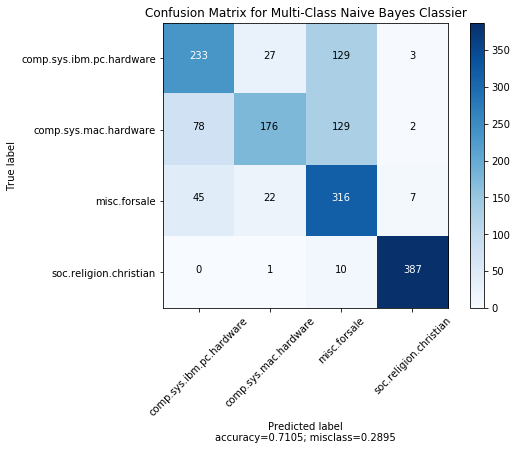

Normalized confusion matrix
[[0.5944 0.0689 0.3291 0.0077]
 [0.2026 0.4571 0.3351 0.0052]
 [0.1154 0.0564 0.8103 0.0179]
 [0.     0.0025 0.0251 0.9724]]


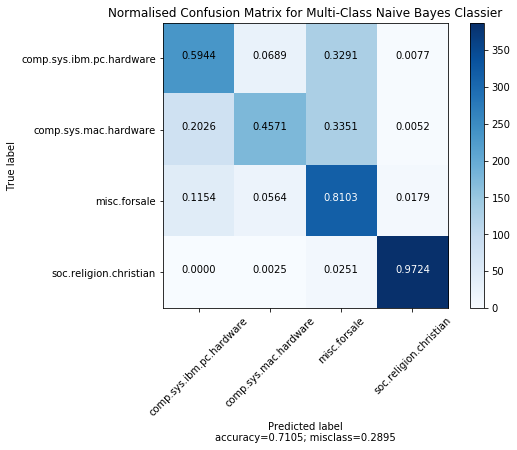

Other Evaluations for Multi-Class Naive Bayes Classier
Accuracy = 0.7105
Recall = 0.7105
Precision = 0.7370
F1_score = 0.7064


In [228]:
Q8clf_NB = GaussianNB().fit(Q8X_train_lsi, Q8train_dataset.target)
Q8EvaluationReport(Q8clf_NB, Q8X_test_lsi, Q8test_dataset.target, 'weighted','Multi-Class Naive Bayes Classier')

###  SVM One Vs One

Confusion matrix, without normalization
[[321  46  25   0]
 [ 43 325  17   0]
 [ 18  18 351   3]
 [  4   0   3 391]]


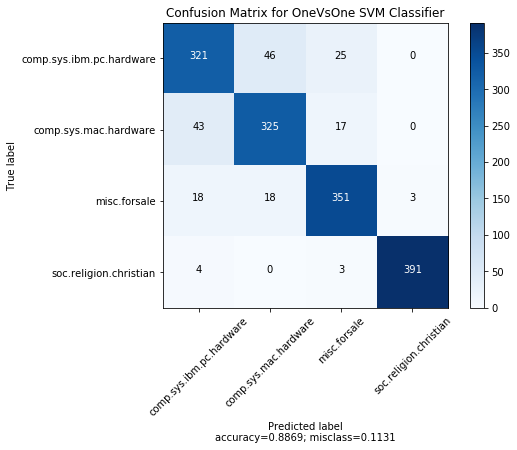

Normalized confusion matrix
[[0.8189 0.1173 0.0638 0.    ]
 [0.1117 0.8442 0.0442 0.    ]
 [0.0462 0.0462 0.9    0.0077]
 [0.0101 0.     0.0075 0.9824]]


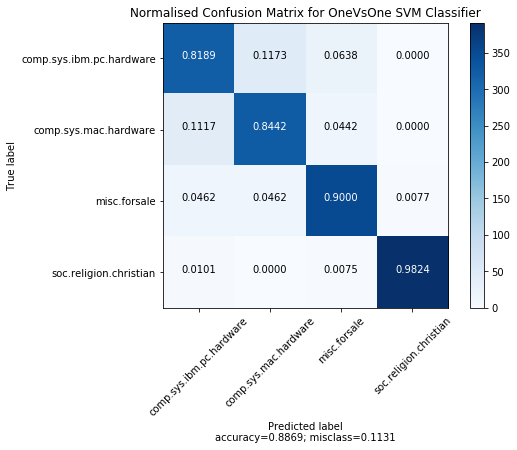

Other Evaluations for OneVsOne SVM Classifier
Accuracy = 0.8869
Recall = 0.8869
Precision = 0.8871
F1_score = 0.8870


In [231]:
from sklearn.multiclass import OneVsOneClassifier
SVM_OneVOne = OneVsOneClassifier(SVC(C = 100, kernel = 'linear', random_state = 42)).fit(Q8X_train_lsi, Q8train_dataset.target)
Q8EvaluationReport(SVM_OneVOne, Q8X_test_lsi, Q8test_dataset.target, 'weighted','OneVsOne SVM Classifier')

### SVM One Vs Rest

Confusion matrix, without normalization
[[311  51  28   2]
 [ 41 327  16   1]
 [ 16  21 349   4]
 [  3   1   3 391]]


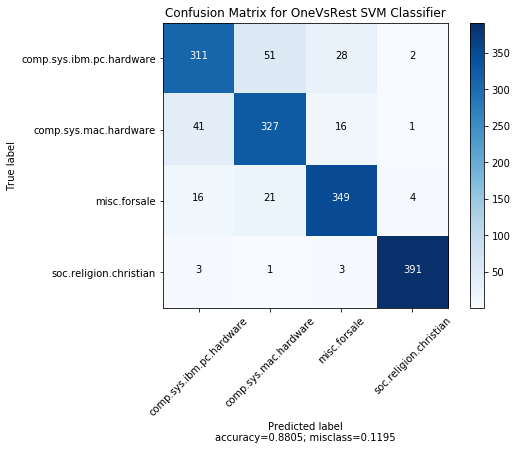

Normalized confusion matrix
[[0.7934 0.1301 0.0714 0.0051]
 [0.1065 0.8494 0.0416 0.0026]
 [0.041  0.0538 0.8949 0.0103]
 [0.0075 0.0025 0.0075 0.9824]]


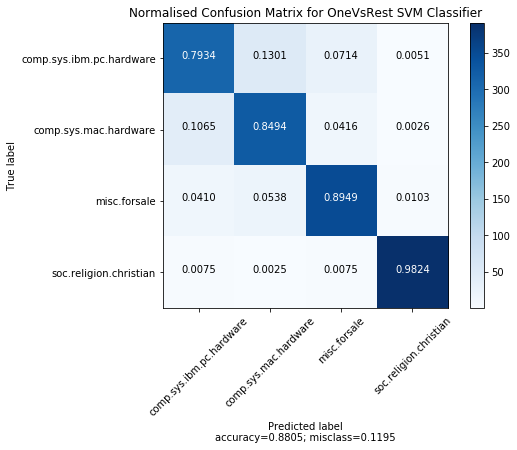

Other Evaluations for OneVsRest SVM Classifier
Accuracy = 0.8805
Recall = 0.8805
Precision = 0.8805
F1_score = 0.8803


In [232]:
from sklearn.multiclass import OneVsRestClassifier
SVM_OneVRest = OneVsRestClassifier(SVC(C = 100, kernel = 'linear', random_state = 42)).fit(Q8X_train_lsi, Q8train_dataset.target)
Q8EvaluationReport(SVM_OneVRest, Q8X_test_lsi, Q8test_dataset.target, 'weighted','OneVsRest SVM Classifier')